In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv("student_data.csv")
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# **Counting Number of Entities**

In [7]:
data['school'].value_counts()

school
GP    349
MS     46
Name: count, dtype: int64

In [8]:
data['sex'].value_counts()

sex
F    208
M    187
Name: count, dtype: int64

In [9]:
data['age'].value_counts()

age
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: count, dtype: int64

In [10]:
data['famsize'].value_counts()

famsize
GT3    281
LE3    114
Name: count, dtype: int64

In [11]:
data['traveltime'].value_counts()

traveltime
1    257
2    107
3     23
4      8
Name: count, dtype: int64

In [12]:
data['studytime'].value_counts()

studytime
2    198
1    105
3     65
4     27
Name: count, dtype: int64

In [13]:
data['failures'].value_counts()

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

In [14]:
data['Mjob'].value_counts()

Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

In [15]:
data['Fjob'].value_counts()

Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

#  **Failure**

In [17]:
Fail_0 = data.where(data['failures']==0)
Fail_0 = Fail_0.dropna()
Fail_0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,6.0,5.0,6.0,6.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,4.0,5.0,5.0,6.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,2.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,4.0,6.0,10.0,10.0
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4.0,2.0,1.0,2.0,5.0,10.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18.0,R,GT3,T,4.0,4.0,teacher,at_home,...,4.0,4.0,3.0,2.0,2.0,5.0,7.0,6.0,5.0,6.0
388,MS,F,18.0,U,LE3,T,3.0,1.0,teacher,services,...,4.0,3.0,4.0,1.0,1.0,1.0,0.0,7.0,9.0,8.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,2.0,4.0,5.0,3.0,4.0,2.0,3.0,14.0,16.0,16.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,0.0,11.0,12.0,10.0


In [18]:
Fail_1 = data.where(data['failures']==1)
Fail_1 = Fail_1.dropna()
Fail_1

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
40,GP,F,16.0,U,LE3,T,2.0,2.0,other,other,...,3.0,3.0,3.0,1.0,2.0,3.0,25.0,7.0,10.0,11.0
44,GP,F,16.0,U,LE3,T,2.0,2.0,other,at_home,...,4.0,3.0,3.0,2.0,2.0,5.0,14.0,10.0,10.0,9.0
49,GP,F,15.0,U,GT3,T,4.0,4.0,services,teacher,...,4.0,4.0,4.0,1.0,1.0,3.0,2.0,7.0,7.0,7.0
52,GP,M,15.0,U,LE3,A,4.0,2.0,health,health,...,5.0,5.0,5.0,3.0,4.0,5.0,6.0,11.0,11.0,10.0
88,GP,M,16.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,2.0,1.0,1.0,3.0,12.0,11.0,10.0,10.0
95,GP,F,15.0,R,GT3,T,1.0,1.0,at_home,other,...,3.0,1.0,2.0,1.0,1.0,1.0,2.0,7.0,10.0,10.0
111,GP,F,16.0,R,GT3,T,3.0,3.0,services,other,...,4.0,1.0,2.0,1.0,1.0,2.0,0.0,7.0,10.0,10.0
112,GP,F,16.0,U,GT3,T,2.0,2.0,at_home,other,...,3.0,1.0,2.0,1.0,1.0,5.0,6.0,10.0,13.0,13.0
118,GP,M,17.0,R,GT3,T,1.0,3.0,other,other,...,5.0,2.0,4.0,1.0,4.0,5.0,20.0,9.0,7.0,8.0
138,GP,M,16.0,U,LE3,T,1.0,1.0,services,other,...,4.0,4.0,4.0,1.0,3.0,5.0,0.0,14.0,12.0,12.0


In [19]:
Fail_2 = data.where(data['failures']==2)
Fail_2 = Fail_2.dropna()
Fail_2

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
25,GP,F,16.0,U,GT3,T,2.0,2.0,services,services,...,1.0,2.0,2.0,1.0,3.0,5.0,14.0,6.0,9.0,8.0
72,GP,F,15.0,R,GT3,T,1.0,1.0,other,other,...,3.0,3.0,4.0,2.0,4.0,5.0,2.0,8.0,6.0,5.0
85,GP,F,15.0,U,GT3,T,4.0,4.0,services,services,...,4.0,4.0,4.0,2.0,3.0,5.0,6.0,7.0,9.0,8.0
128,GP,M,18.0,R,GT3,T,2.0,2.0,services,other,...,3.0,3.0,3.0,1.0,2.0,4.0,0.0,7.0,4.0,0.0
130,GP,F,15.0,R,GT3,T,3.0,4.0,services,teacher,...,4.0,2.0,2.0,2.0,2.0,5.0,0.0,12.0,0.0,0.0
137,GP,F,16.0,U,GT3,A,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,1.0,5.0,0.0,4.0,0.0,0.0
141,GP,M,16.0,U,LE3,T,2.0,2.0,services,services,...,2.0,3.0,3.0,2.0,2.0,2.0,8.0,9.0,9.0,9.0
152,GP,F,15.0,R,GT3,T,3.0,3.0,services,services,...,4.0,2.0,1.0,2.0,3.0,3.0,8.0,10.0,10.0,10.0
160,GP,M,17.0,R,LE3,T,2.0,1.0,at_home,other,...,3.0,3.0,2.0,2.0,2.0,5.0,0.0,7.0,6.0,0.0
161,GP,M,15.0,R,GT3,T,3.0,2.0,other,other,...,4.0,4.0,4.0,1.0,4.0,3.0,6.0,5.0,9.0,7.0


In [20]:
Fail_3 = data.where(data['failures']==3)
Fail_3 = Fail_3.dropna()
Fail_3

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,other,...,4.0,3.0,2.0,2.0,3.0,3.0,10.0,7.0,8.0,10.0
18,GP,M,17.0,U,GT3,T,3.0,2.0,services,services,...,5.0,5.0,5.0,2.0,4.0,5.0,16.0,6.0,5.0,5.0
78,GP,M,17.0,U,GT3,T,2.0,1.0,other,other,...,4.0,5.0,1.0,1.0,1.0,3.0,2.0,8.0,8.0,10.0
127,GP,F,19.0,U,GT3,T,0.0,1.0,at_home,other,...,3.0,4.0,2.0,1.0,1.0,5.0,2.0,7.0,8.0,9.0
144,GP,M,17.0,U,GT3,T,2.0,1.0,other,other,...,5.0,4.0,5.0,1.0,2.0,5.0,0.0,5.0,0.0,0.0
146,GP,F,15.0,U,GT3,T,3.0,2.0,health,services,...,3.0,3.0,2.0,1.0,1.0,3.0,0.0,6.0,7.0,0.0
149,GP,M,15.0,U,LE3,A,2.0,1.0,services,other,...,4.0,5.0,5.0,2.0,5.0,5.0,0.0,8.0,9.0,10.0
150,GP,M,18.0,U,LE3,T,1.0,1.0,other,other,...,2.0,3.0,5.0,2.0,5.0,4.0,0.0,6.0,5.0,0.0
153,GP,M,19.0,U,GT3,T,3.0,2.0,services,at_home,...,4.0,5.0,4.0,1.0,1.0,4.0,0.0,5.0,0.0,0.0
157,GP,F,18.0,R,GT3,T,1.0,1.0,at_home,other,...,5.0,2.0,5.0,1.0,5.0,4.0,6.0,9.0,8.0,10.0


**Failure Outliers**

<Axes: >

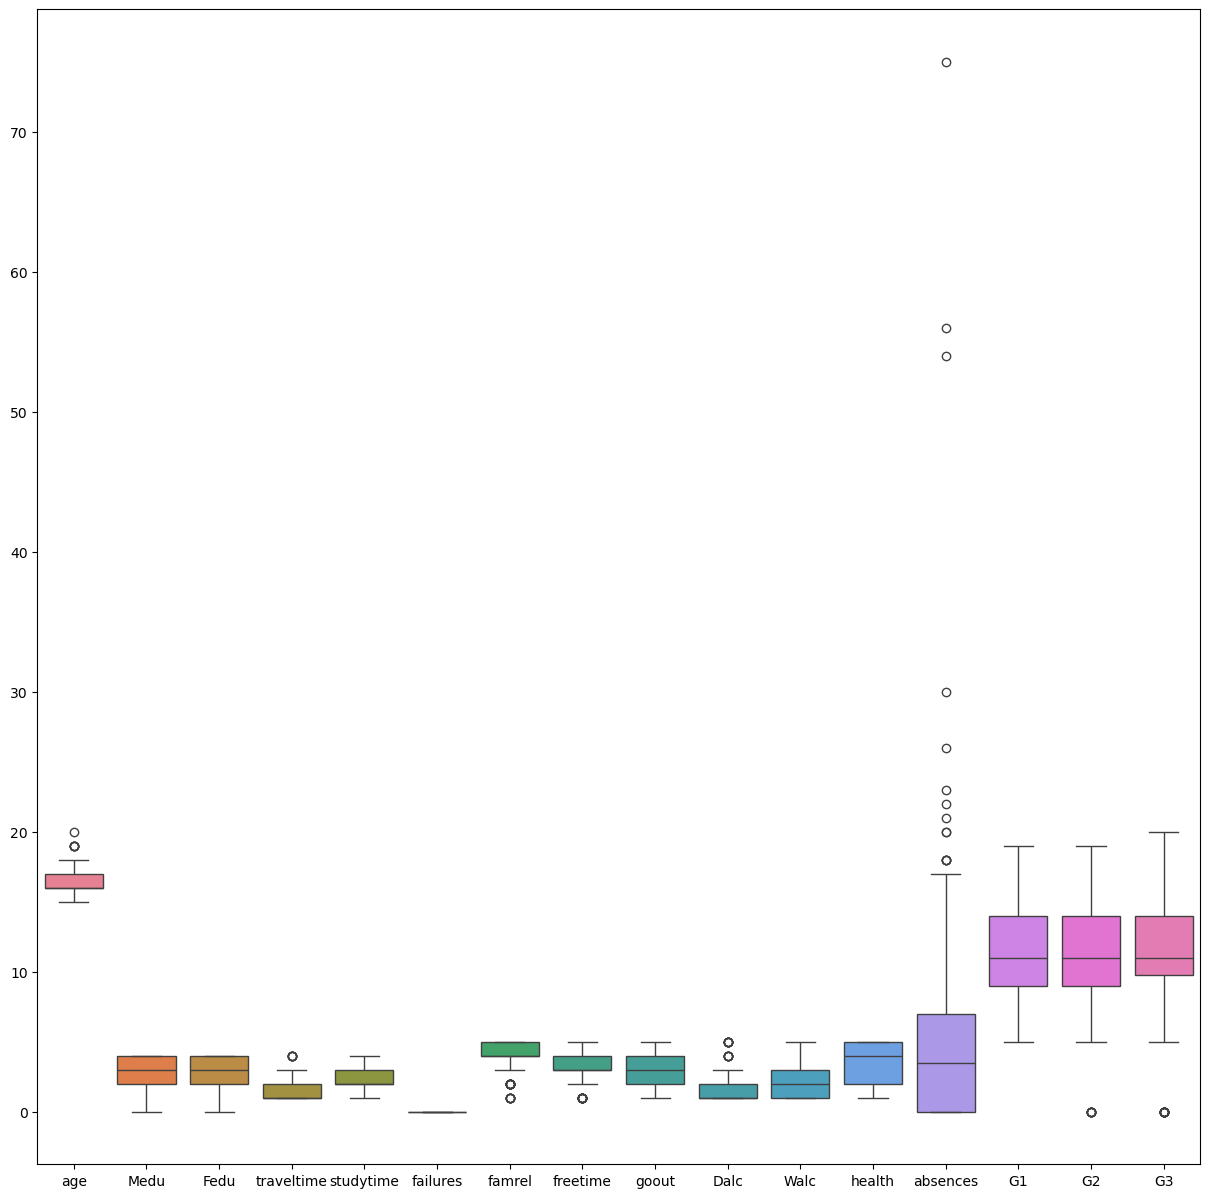

In [22]:
#With Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_0,ax=ax)

> Handling Fail_0 Outliers

In [24]:
Fail_0['age'].value_counts()

age
16.0    88
17.0    84
15.0    71
18.0    63
19.0     5
20.0     1
Name: count, dtype: int64

In [25]:
age_mean = round(Fail_0['age'].mean())
Fail_0['age']=Fail_0['age'].apply(lambda x : age_mean if x>18 else x)

In [26]:
Fail_0['traveltime'].value_counts()

traveltime
1.0    209
2.0     80
3.0     17
4.0      6
Name: count, dtype: int64

In [27]:
Travel_mean = round(Fail_0['traveltime'].mean())
# round(Medu_mean)
Fail_0['traveltime'] = Fail_0['traveltime'].replace(4,Travel_mean)

In [28]:
Fail_0['famrel'].value_counts()

famrel
4.0    151
5.0     88
3.0     54
2.0     13
1.0      6
Name: count, dtype: int64

In [29]:
Famrel_Mean = round(Fail_0['famrel'].mean())
Fail_0['famrel']= Fail_0['famrel'].apply(lambda x:x if x>=3 else Famrel_Mean)

In [30]:
Fail_0['freetime'].value_counts()

freetime
3.0    134
4.0     86
2.0     52
5.0     27
1.0     13
Name: count, dtype: int64

In [31]:
Freetime_Mean = round(Fail_0['freetime'].mean())
Fail_0['freetime']= Fail_0['freetime'].replace(1,Freetime_Mean)

In [32]:
Fail_0['Dalc'].value_counts()

Dalc
1.0    232
2.0     50
3.0     17
5.0      7
4.0      6
Name: count, dtype: int64

In [33]:
Fail_0['Dalc'] = Fail_0['Dalc'].apply(lambda x : x if x<4 else 3)

In [34]:
Absence = Fail_0['absences'].value_counts()
Absence = pd.DataFrame(Absence)
Absence = Absence.reset_index()
Absence

,absences,count
0,0.0,89
1,2.0,58
2,4.0,47
3,6.0,25
4,8.0,17
5,10.0,15
6,12.0,9
7,14.0,8
8,3.0,6
9,7.0,6


In [35]:
Fail_0['absences']=Absence['count'].apply(lambda x:x if x<=2 else round(Fail_0['absences'].mean()))

In [36]:
Fail_0['G2'].value_counts()

G2
10.0    37
9.0     37
15.0    34
12.0    34
13.0    32
11.0    31
14.0    21
8.0     20
16.0    13
18.0    11
7.0     11
6.0      9
0.0      8
5.0      6
17.0     5
19.0     3
Name: count, dtype: int64

In [37]:
G2_Mean = round(Fail_0['G2'].mean())
Fail_0['G2'] = Fail_0['G2'].apply(lambda x:x if x>=8 else G2_Mean)

In [38]:
Fail_0['G3'].value_counts()

G3
10.0    45
11.0    42
15.0    32
14.0    26
13.0    25
12.0    25
9.0     21
0.0     18
8.0     18
16.0    16
6.0     15
18.0    11
17.0     6
19.0     5
5.0      3
7.0      3
20.0     1
Name: count, dtype: int64

In [39]:
G3_Mean = round(Fail_0['G3'].mean())
G3_Mean
Fail_0['G3'] = Fail_0['G3'].apply(lambda x:x if x>6 else G2_Mean)

<Axes: >

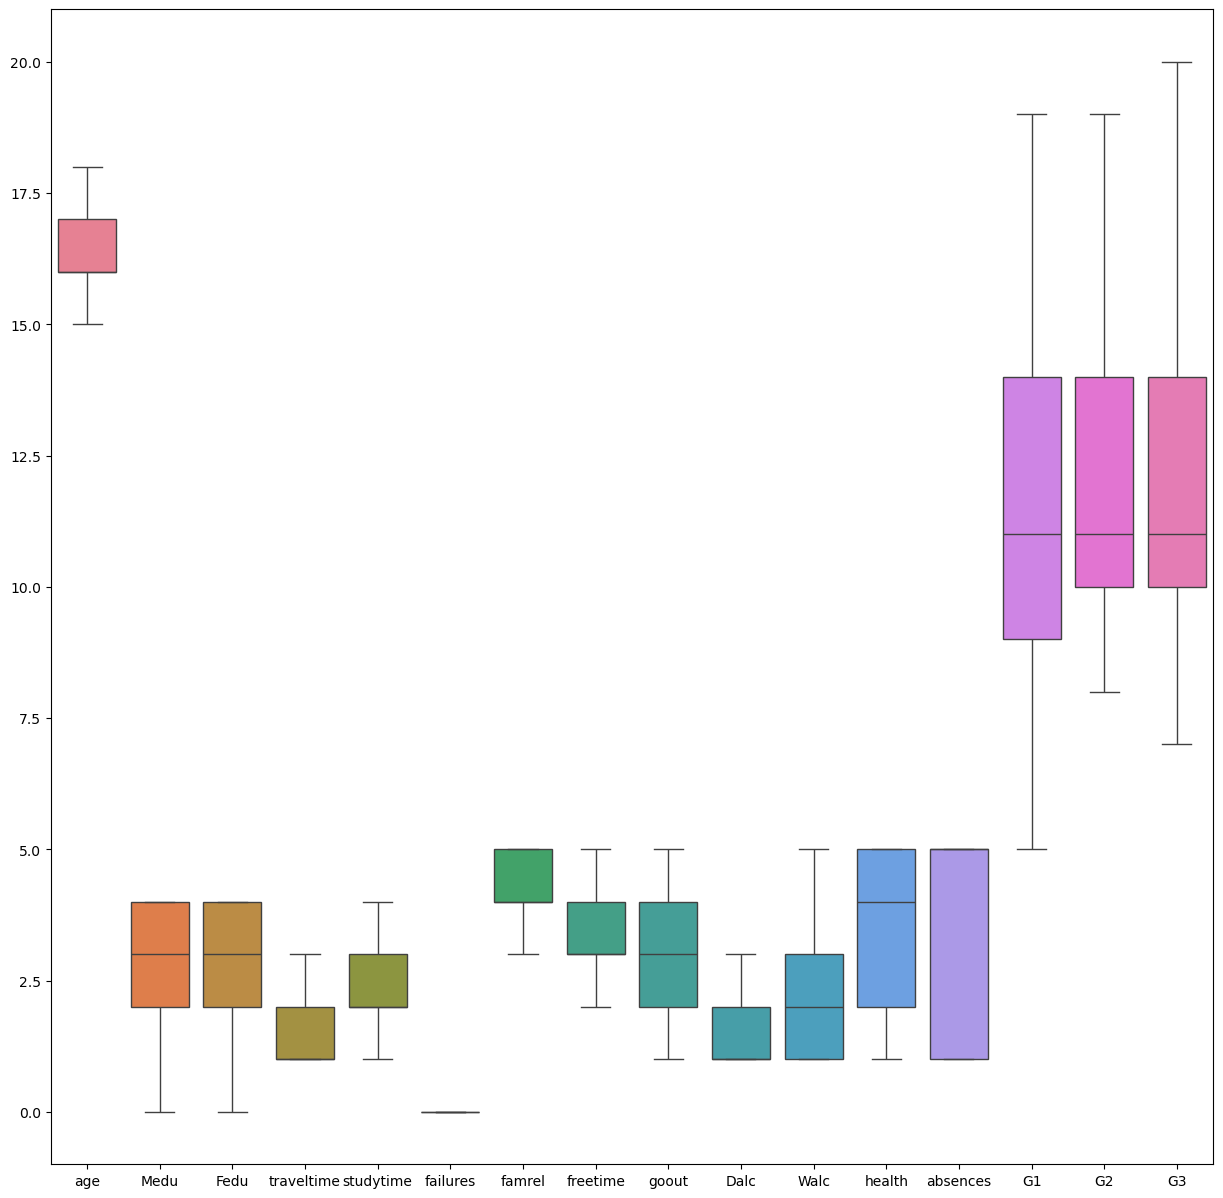

In [40]:
#After Removing Outliers 
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_0,ax=ax)

C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\2969027086.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = Fail_0,kind='kde')


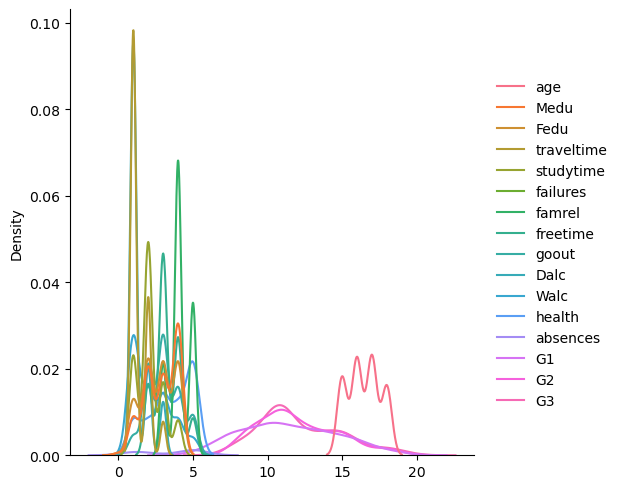

In [41]:
# fig,ax = plt.subplots(figsize = (15,15))
sns.displot(data = Fail_0,kind='kde')

> **Fail_0 Linear Regression**

In [43]:
fail_0_X =  Fail_0.iloc[:,:-1].select_dtypes(include="float64")
fail_0_Y = Fail_0.iloc[:,:-1].select_dtypes(include="float64")

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(fail_0_X,fail_0_Y,test_size=0.3,random_state=45)

In [45]:
X_train.dtypes

age           float64
Medu          float64
Fedu          float64
traveltime    float64
studytime     float64
failures      float64
famrel        float64
freetime      float64
goout         float64
Dalc          float64
Walc          float64
health        float64
absences      float64
G1            float64
G2            float64
dtype: object

In [46]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
X_train_norm = scaler.fit_transform(X_train.select_dtypes(include="float64").dropna())

In [47]:
X_train_norm

array([[ 0.71818485, -1.8973666 , -1.15470054,  1.17932379,  0.29559878,
         0.        ,  1.41421356,  0.83205029,  1.336198  ,  3.87298335,
         2.29227953,  1.0059702 , -1.04560405,  0.38646346,  0.10259784],
       [-0.92338052,  0.63245553,  0.        ,  1.17932379,  0.29559878,
         0.        ,  1.41421356,  0.83205029,  0.31814238, -0.25819889,
         0.13483997, -0.23214697,  1.11306237, -0.70472748, -1.12857619],
       [ 0.71818485, -0.63245553,  0.        ,  2.89470384,  0.29559878,
         0.        ,  1.41421356, -0.2773501 , -0.69991324, -0.25819889,
        -0.94387981,  0.38691162, -0.50593744, -1.43218811, -1.12857619],
       [-0.92338052,  0.63245553,  1.15470054, -0.53605627, -1.28092806,
         0.        ,  1.41421356,  0.83205029, -0.69991324, -0.25819889,
        -0.94387981,  1.0059702 , -1.04560405,  0.02273314,  0.92338052],
       [ 0.71818485,  0.63245553,  1.15470054, -0.53605627, -1.28092806,
         0.        ,  0.        ,  0.83205029, 

<Axes: >

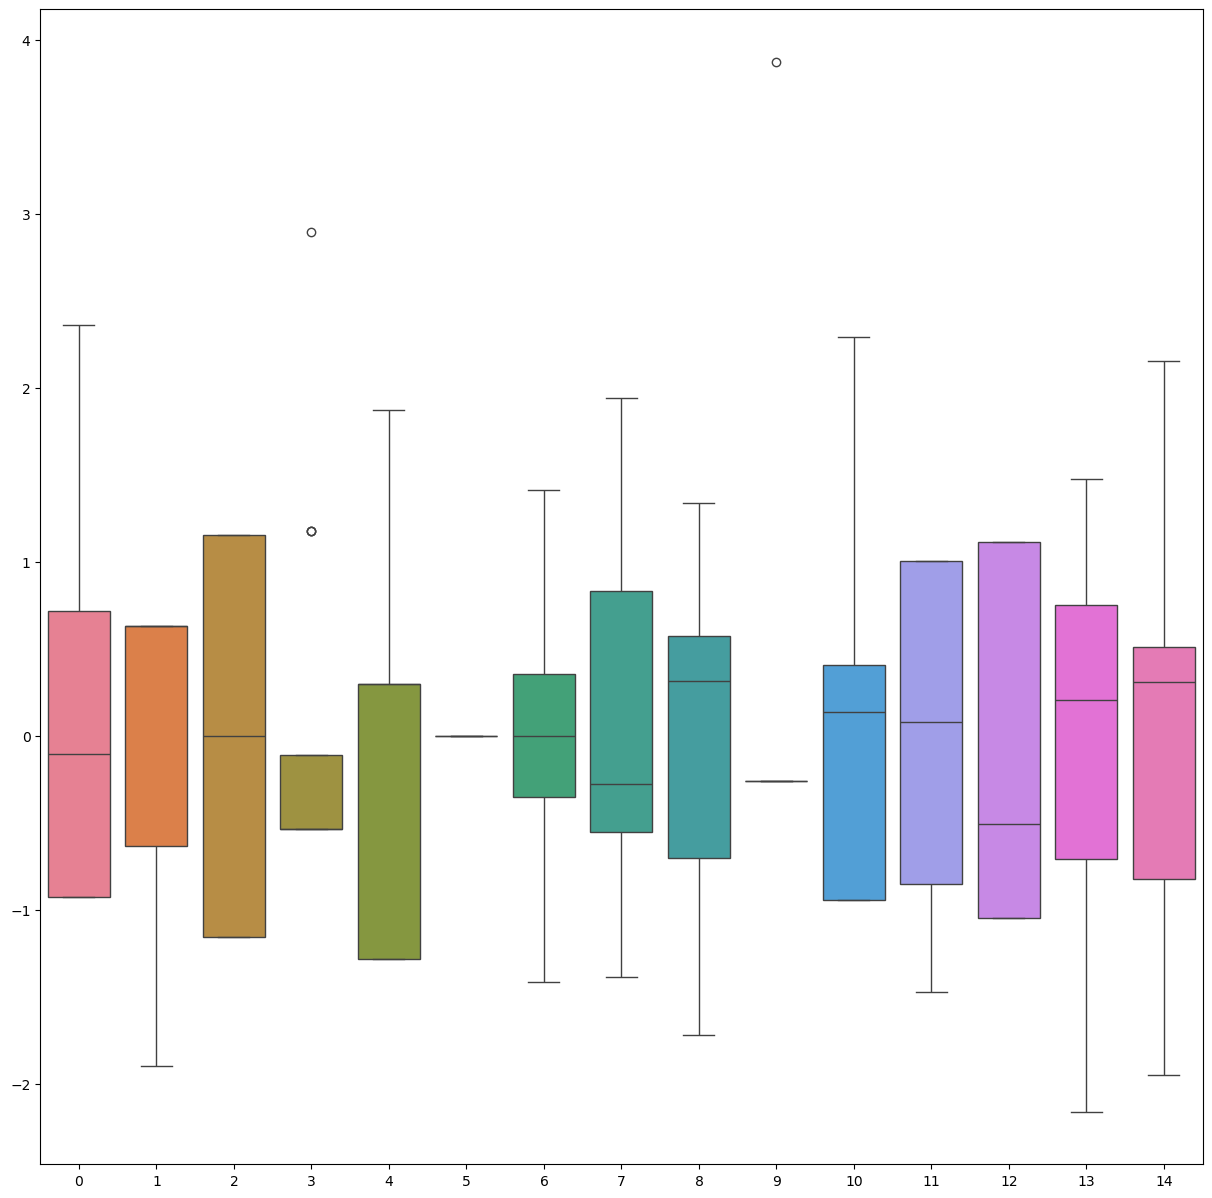

In [48]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_train_norm,ax=ax)

In [49]:
X_test_norm = scaler.transform(X_test.select_dtypes(include="float64").dropna())

In [50]:
X_test_norm

array([[ 4.00131557,  0.63245553,  1.15470054,  1.17932379,  0.29559878,
         0.        ,  0.        , -0.2773501 ,  1.336198  , -0.25819889,
        -0.94387981, -0.23214697,  1.11306237, -2.52337906, -0.71818485],
       [ 0.71818485,  0.63245553,  0.        , -0.53605627,  0.29559878,
         0.        ,  1.41421356,  0.83205029, -0.69991324, -0.25819889,
         0.13483997,  1.0059702 ,  1.11306237,  1.11392409,  0.92338052],
       [-0.92338052, -1.8973666 , -1.15470054, -0.53605627,  1.87212563,
         0.        ,  0.        ,  1.94145069, -0.69991324, -0.25819889,
        -0.94387981, -0.23214697,  1.11306237,  0.75019377,  1.33377186],
       [ 0.71818485, -0.63245553,  0.        , -0.53605627,  0.29559878,
         0.        ,  0.        , -0.2773501 , -0.69991324, -0.25819889,
         0.13483997,  1.0059702 ,  1.11306237, -2.15964874, -1.12857619],
       [ 2.35975021, -3.16227766, -2.30940108, -0.53605627,  0.29559878,
         0.        ,  1.41421356, -0.2773501 , 

<Axes: >

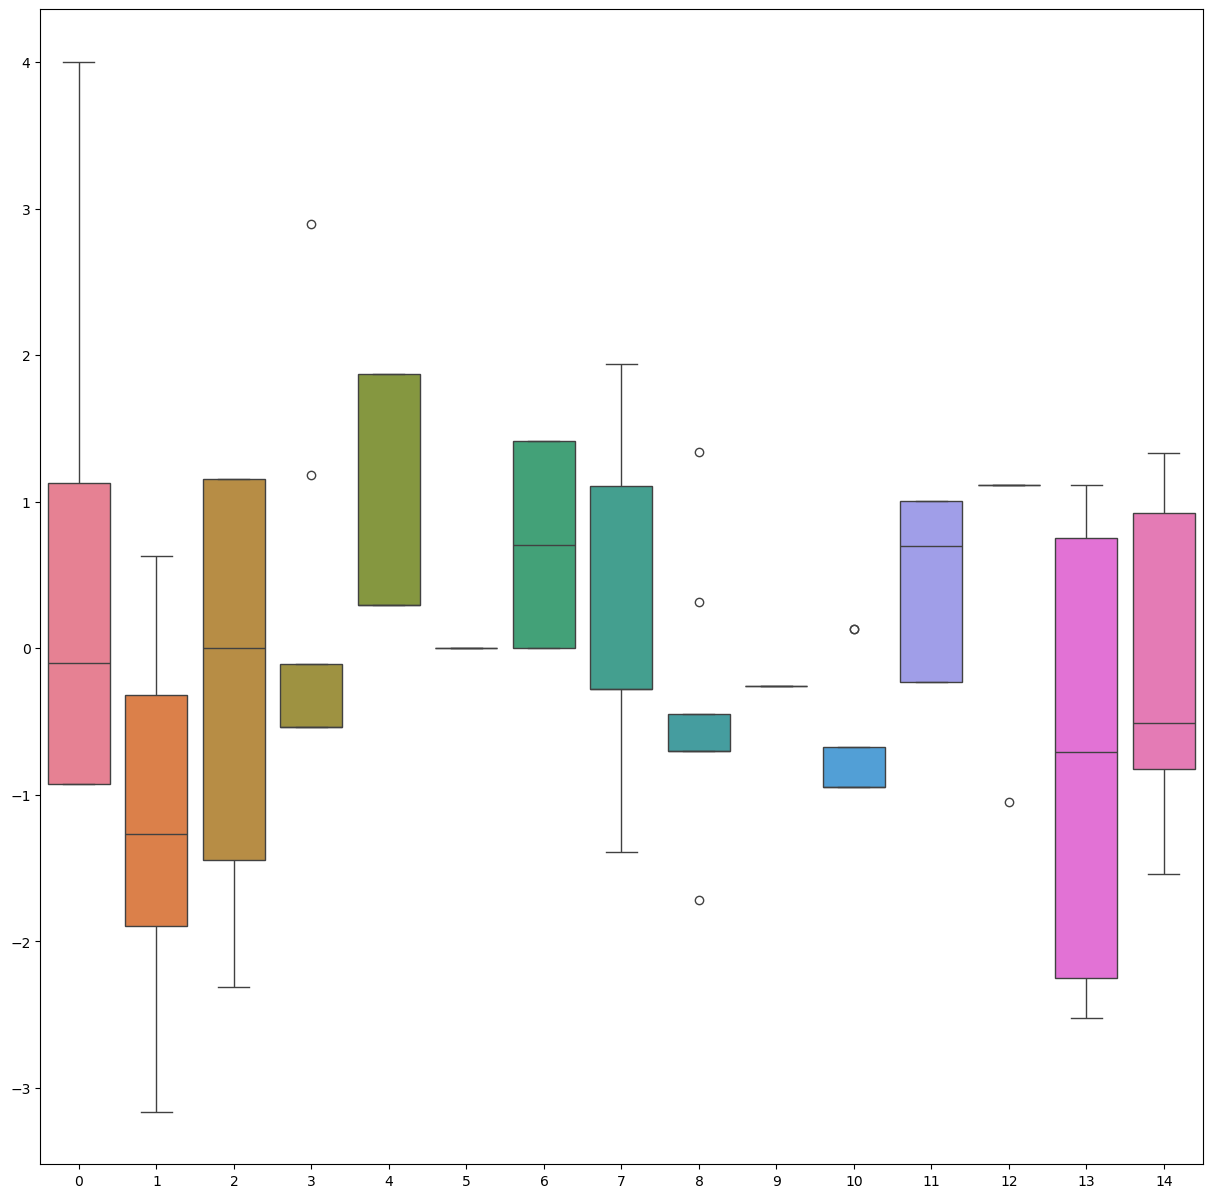

In [51]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_test_norm,ax=ax)

In [52]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_norm,Y_train.dropna())

LinearRegression()

In [53]:
print(regression.coef_)

[[ 6.09174647e-01 -5.07205469e-18 -4.77846044e-17  2.94638273e-16
  -7.18875381e-17 -2.47383308e-16  1.00105438e-16  1.88341462e-16
  -1.19465458e-17 -5.47060832e-17  2.76527754e-17  3.46767336e-16
   6.98792983e-17 -1.01038781e-16  8.66674560e-17]
 [ 7.70442602e-16  7.90569415e-01 -4.13827465e-16 -4.77888205e-16
  -5.64735913e-16 -2.22044605e-16  7.06150233e-16 -6.91351067e-16
  -1.76258950e-16  3.97760489e-16 -6.36402380e-16  1.86837556e-16
  -1.84946370e-17  6.92205041e-16 -9.95206477e-16]
 [ 2.02974765e-16 -2.80795484e-16  8.66025404e-01 -6.51694482e-16
   3.62803494e-16  1.11022302e-16  6.90431464e-16 -1.58657993e-16
  -3.00476391e-16 -2.41666345e-16  2.62889634e-16 -1.63807638e-16
   4.21757109e-17 -4.30627833e-17 -4.53135085e-16]
 [ 7.04187905e-16  2.37861003e-16 -1.19158685e-16  5.82961191e-01
  -4.79122459e-16  2.49800181e-16  4.78254141e-16 -5.98107879e-16
  -4.70247479e-17  1.76052047e-16 -7.25351336e-18  5.57385846e-18
  -4.88443053e-17  5.62564601e-16 -8.43180087e-16]
 [-2

In [54]:
reg_predict = regression.predict(X_test_norm)
reg_predict

array([[18.,  4.,  4.,  2.,  2.,  0.,  4.,  3.,  4.,  1.,  1.,  3.,  5.,
         5., 11.],
       [16.,  4.,  3.,  1.,  2.,  0.,  5.,  4.,  2.,  1.,  2.,  5.,  5.,
        15., 15.],
       [15.,  2.,  2.,  1.,  3.,  0.,  4.,  5.,  2.,  1.,  1.,  3.,  5.,
        14., 16.],
       [16.,  3.,  3.,  1.,  2.,  0.,  4.,  3.,  2.,  1.,  2.,  5.,  5.,
         6., 10.],
       [17.,  1.,  1.,  1.,  2.,  0.,  5.,  3.,  3.,  1.,  1.,  3.,  5.,
         5., 11.],
       [15.,  3.,  4.,  1.,  2.,  0.,  5.,  5.,  1.,  1.,  1.,  5.,  5.,
        14., 15.],
       [15.,  2.,  4.,  1.,  3.,  0.,  4.,  3.,  2.,  1.,  1.,  5.,  1.,
        10.,  9.],
       [15.,  2.,  1.,  3.,  3.,  0.,  5.,  2.,  2.,  1.,  1.,  4.,  5.,
        10., 12.]])

In [55]:
residual = Y_test.select_dtypes(include='float64').dropna()-reg_predict
residual

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0.000000e+00,-1.776357e-15,4.440892e-16,-1.332268e-15,1.332268e-15,0.0,-2.664535e-15,-1.776357e-15,3.552714e-15,-2.220446e-16,-2.220446e-16,-5.329071e-15,0.000000e+00,-2.664535e-15,-8.881784e-15
5,0.000000e+00,-8.881784e-16,-8.881784e-16,-6.661338e-16,8.881784e-16,0.0,-1.776357e-15,0.000000e+00,4.440892e-16,2.220446e-16,1.554312e-15,-2.664535e-15,-1.776357e-15,-1.776357e-15,-7.105427e-15
14,0.000000e+00,2.886580e-15,-8.881784e-16,3.552714e-15,1.776357e-15,0.0,2.220446e-15,2.664535e-15,-3.108624e-15,4.440892e-16,-1.776357e-15,1.776357e-15,1.776357e-15,3.552714e-15,1.065814e-14
4,0.000000e+00,-4.440892e-16,-1.776357e-15,-2.220446e-16,6.661338e-16,0.0,0.000000e+00,8.881784e-16,4.440892e-16,0.000000e+00,-8.881784e-16,-3.552714e-15,-1.776357e-15,4.440892e-15,-7.105427e-15
1,0.000000e+00,-3.108624e-15,-3.108624e-15,-1.110223e-15,4.440892e-16,0.0,-1.776357e-15,-1.776357e-15,8.881784e-16,-4.440892e-16,0.000000e+00,-3.552714e-15,-3.552714e-15,3.552714e-15,-5.329071e-15
9,-1.776357e-15,8.881784e-16,0.000000e+00,1.776357e-15,8.881784e-16,0.0,0.000000e+00,1.776357e-15,-1.110223e-15,4.440892e-16,-8.881784e-16,-1.776357e-15,0.000000e+00,3.552714e-15,-1.776357e-15
24,0.000000e+00,2.220446e-16,-1.776357e-15,7.771561e-16,8.881784e-16,0.0,4.440892e-16,8.881784e-16,0.000000e+00,-2.220446e-16,-4.440892e-16,0.000000e+00,-2.220446e-16,5.329071e-15,0.000000e+00
11,-1.776357e-15,2.220446e-16,-8.881784e-16,1.776357e-15,8.881784e-16,0.0,0.000000e+00,-1.332268e-15,-2.664535e-15,0.000000e+00,-1.332268e-15,2.664535e-15,7.105427e-15,1.776357e-15,5.329071e-15


C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\4192276842.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(residual,kind = 'kde')


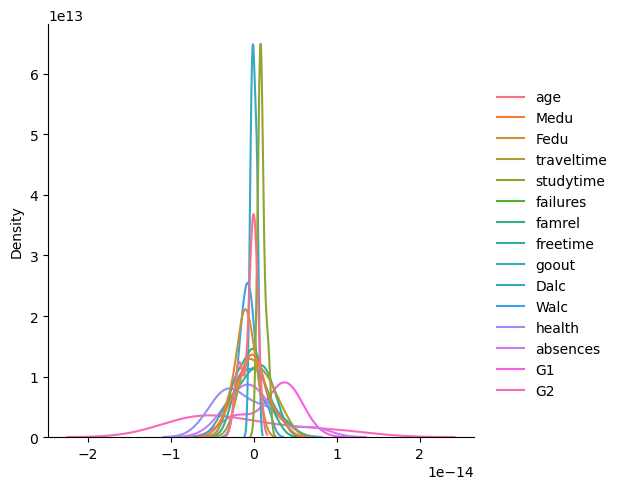

In [56]:
sns.displot(residual,kind = 'kde')

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print(mean_squared_error(Y_test.dropna(),reg_predict))
print(mean_absolute_error(Y_test.dropna(),reg_predict))
print(r2_score(Y_test.dropna(),reg_predict))

6.328246290333504e-30
1.6200004300988743e-15
0.9333333333333333


> Handling Fail_1 Outliers

<Axes: >

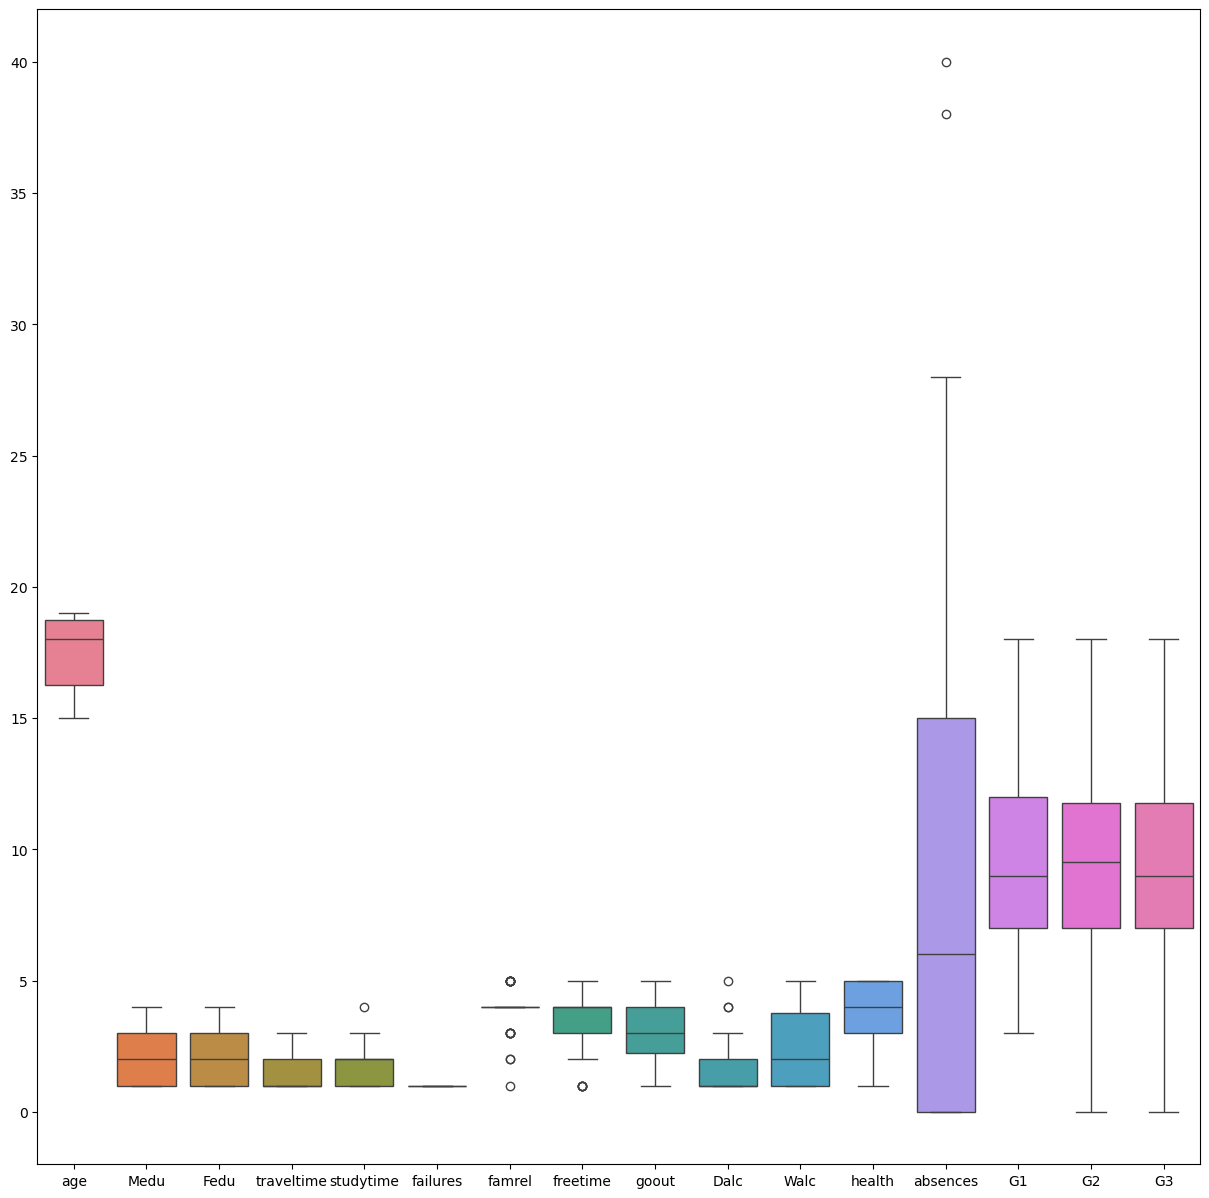

In [59]:
# Before Removing Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_1,ax=ax)

In [60]:
Fail_1['studytime'].value_counts()

studytime
2.0    26
1.0    16
3.0     7
4.0     1
Name: count, dtype: int64

In [61]:
Studytime_mean = round(Fail_1['studytime'].mean())
Fail_1['studytime']=Fail_1['studytime'].replace(4,Studytime_mean)

In [62]:
Fail_1['famrel'].value_counts()

famrel
4.0    32
5.0     9
3.0     6
2.0     2
1.0     1
Name: count, dtype: int64

In [63]:
famrel_mean = round(Fail_1['famrel'].mean())
Fail_1['famrel']=Fail_1['famrel'].apply(lambda x:x if x==famrel_mean else famrel_mean)

In [64]:
Fail_1['freetime'].value_counts()

freetime
4.0    20
3.0    11
5.0     7
2.0     7
1.0     5
Name: count, dtype: int64

In [65]:
Freetime_mean = round(Fail_1['freetime'].mean())
Fail_1['freetime']=Fail_1['freetime'].replace(1,Freetime_mean)

In [66]:
Fail_1['Dalc'].value_counts()

Dalc
1.0    29
2.0    12
3.0     6
4.0     2
5.0     1
Name: count, dtype: int64

In [67]:
Dalc_Mean = round(Fail_1['Dalc'].mean())
Fail_1['Dalc'] = Fail_1['Dalc'].apply(lambda x:x if x<4 else Dalc_Mean)

In [68]:
Fail_1['absences'].value_counts()

absences
0.0     14
2.0      4
4.0      4
6.0      3
12.0     3
15.0     2
20.0     2
16.0     2
14.0     2
8.0      2
18.0     1
10.0     1
40.0     1
22.0     1
3.0      1
25.0     1
38.0     1
19.0     1
13.0     1
28.0     1
24.0     1
7.0      1
Name: count, dtype: int64

In [69]:
Absences_Mean = round(Fail_1['absences'].mean())
Fail_1['absences'] = Fail_1['absences'].apply(lambda x:x if x<30 else Absences_Mean)

<Axes: >

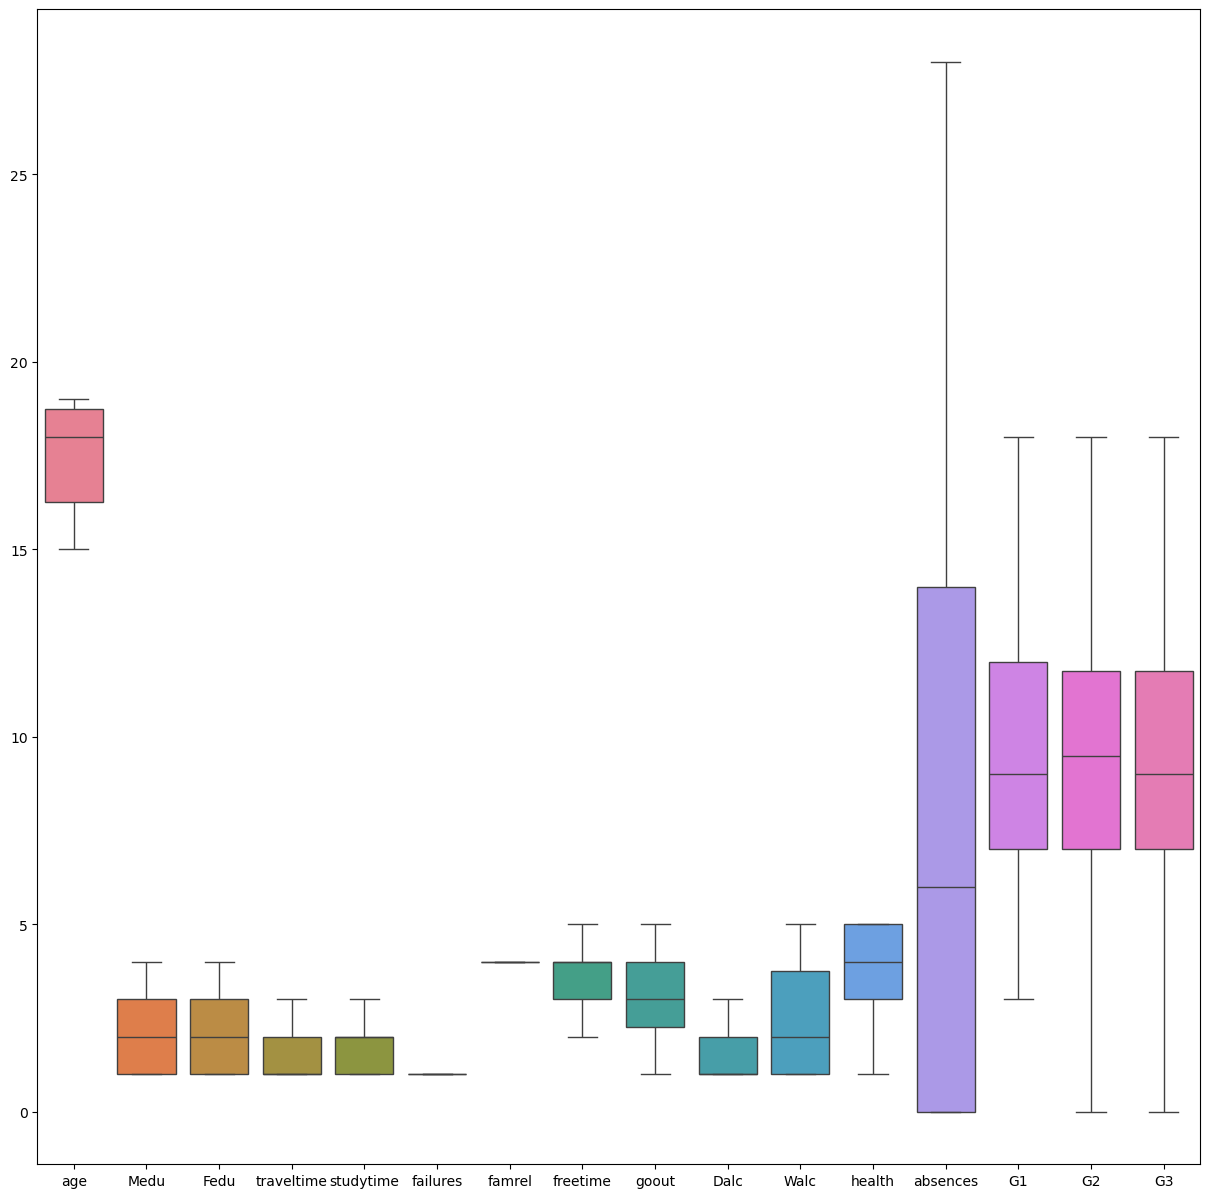

In [70]:
#After Removing Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_1,ax=ax)

C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\3221834503.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(Fail_1,kind='kde')


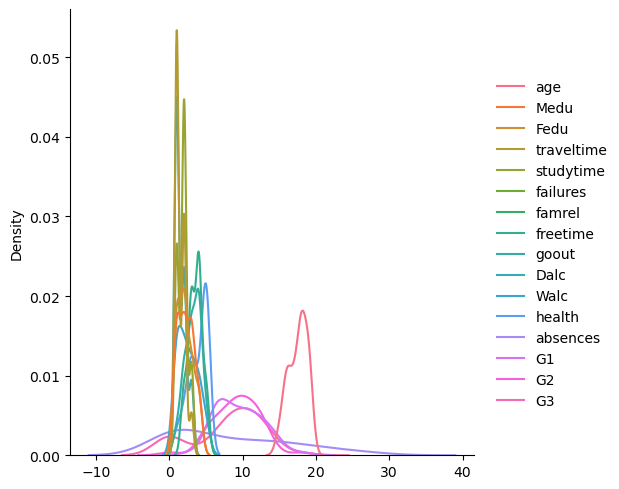

In [71]:
sns.displot(Fail_1,kind='kde')

> Fail_1 Linear Regression

In [73]:
X = Fail_1.iloc[::-1]
Y = Fail_1.iloc[::-1]

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.4,random_state=45)

In [75]:
X_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
88,GP,M,16.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,2.0,1.0,1.0,3.0,12.0,11.0,10.0,10.0
118,GP,M,17.0,R,GT3,T,1.0,3.0,other,other,...,4.0,2.0,4.0,1.0,4.0,5.0,20.0,9.0,7.0,8.0
250,GP,M,18.0,U,GT3,T,3.0,2.0,services,other,...,4.0,4.0,5.0,2.0,4.0,5.0,0.0,6.0,8.0,8.0
292,GP,F,18.0,U,LE3,T,2.0,1.0,services,at_home,...,4.0,4.0,3.0,1.0,1.0,5.0,12.0,12.0,12.0,13.0
239,GP,M,18.0,U,GT3,T,2.0,2.0,other,services,...,4.0,5.0,4.0,3.0,5.0,2.0,0.0,7.0,7.0,0.0
341,GP,M,18.0,U,GT3,T,4.0,4.0,teacher,services,...,4.0,3.0,3.0,2.0,2.0,2.0,0.0,10.0,10.0,0.0
248,GP,M,18.0,R,LE3,T,3.0,3.0,other,services,...,4.0,3.0,3.0,1.0,3.0,5.0,8.0,3.0,5.0,5.0
213,GP,M,18.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,4.0,2.0,4.0,5.0,15.0,6.0,7.0,8.0
151,GP,M,16.0,U,LE3,T,2.0,1.0,at_home,other,...,4.0,4.0,4.0,3.0,5.0,5.0,6.0,12.0,13.0,14.0
112,GP,F,16.0,U,GT3,T,2.0,2.0,at_home,other,...,4.0,3.0,2.0,1.0,1.0,5.0,6.0,10.0,13.0,13.0


In [76]:
X_test

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
49,GP,F,15.0,U,GT3,T,4.0,4.0,services,teacher,...,4.0,4.0,4.0,1.0,1.0,3.0,2.0,7.0,7.0,7.0
352,MS,M,18.0,U,LE3,T,1.0,3.0,at_home,services,...,4.0,3.0,3.0,2.0,3.0,3.0,7.0,8.0,7.0,8.0
384,MS,M,18.0,R,GT3,T,4.0,2.0,other,other,...,4.0,4.0,3.0,2.0,3.0,3.0,14.0,6.0,5.0,5.0
343,GP,F,17.0,U,GT3,A,2.0,2.0,at_home,at_home,...,4.0,3.0,1.0,1.0,2.0,4.0,0.0,9.0,8.0,0.0
361,MS,M,18.0,R,LE3,T,1.0,1.0,at_home,other,...,4.0,4.0,3.0,2.0,3.0,5.0,2.0,13.0,12.0,12.0
252,GP,M,18.0,U,GT3,T,2.0,1.0,services,services,...,4.0,2.0,5.0,2.0,5.0,5.0,4.0,6.0,9.0,8.0
315,GP,F,19.0,R,GT3,T,2.0,3.0,other,other,...,4.0,3.0,2.0,1.0,1.0,3.0,9.0,13.0,11.0,11.0
162,GP,M,16.0,U,LE3,T,1.0,2.0,other,other,...,4.0,4.0,4.0,2.0,4.0,5.0,0.0,7.0,0.0,0.0
389,MS,F,18.0,U,GT3,T,1.0,1.0,other,other,...,4.0,3.0,1.0,1.0,1.0,5.0,0.0,6.0,5.0,0.0
307,GP,M,19.0,U,GT3,T,4.0,4.0,teacher,services,...,4.0,3.0,4.0,1.0,1.0,4.0,9.0,8.0,9.0,8.0


In [77]:
Y_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
88,GP,M,16.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,2.0,1.0,1.0,3.0,12.0,11.0,10.0,10.0
118,GP,M,17.0,R,GT3,T,1.0,3.0,other,other,...,4.0,2.0,4.0,1.0,4.0,5.0,20.0,9.0,7.0,8.0
250,GP,M,18.0,U,GT3,T,3.0,2.0,services,other,...,4.0,4.0,5.0,2.0,4.0,5.0,0.0,6.0,8.0,8.0
292,GP,F,18.0,U,LE3,T,2.0,1.0,services,at_home,...,4.0,4.0,3.0,1.0,1.0,5.0,12.0,12.0,12.0,13.0
239,GP,M,18.0,U,GT3,T,2.0,2.0,other,services,...,4.0,5.0,4.0,3.0,5.0,2.0,0.0,7.0,7.0,0.0
341,GP,M,18.0,U,GT3,T,4.0,4.0,teacher,services,...,4.0,3.0,3.0,2.0,2.0,2.0,0.0,10.0,10.0,0.0
248,GP,M,18.0,R,LE3,T,3.0,3.0,other,services,...,4.0,3.0,3.0,1.0,3.0,5.0,8.0,3.0,5.0,5.0
213,GP,M,18.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,4.0,2.0,4.0,5.0,15.0,6.0,7.0,8.0
151,GP,M,16.0,U,LE3,T,2.0,1.0,at_home,other,...,4.0,4.0,4.0,3.0,5.0,5.0,6.0,12.0,13.0,14.0
112,GP,F,16.0,U,GT3,T,2.0,2.0,at_home,other,...,4.0,3.0,2.0,1.0,1.0,5.0,6.0,10.0,13.0,13.0


In [78]:
Y_train

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
88,GP,M,16.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,2.0,1.0,1.0,3.0,12.0,11.0,10.0,10.0
118,GP,M,17.0,R,GT3,T,1.0,3.0,other,other,...,4.0,2.0,4.0,1.0,4.0,5.0,20.0,9.0,7.0,8.0
250,GP,M,18.0,U,GT3,T,3.0,2.0,services,other,...,4.0,4.0,5.0,2.0,4.0,5.0,0.0,6.0,8.0,8.0
292,GP,F,18.0,U,LE3,T,2.0,1.0,services,at_home,...,4.0,4.0,3.0,1.0,1.0,5.0,12.0,12.0,12.0,13.0
239,GP,M,18.0,U,GT3,T,2.0,2.0,other,services,...,4.0,5.0,4.0,3.0,5.0,2.0,0.0,7.0,7.0,0.0
341,GP,M,18.0,U,GT3,T,4.0,4.0,teacher,services,...,4.0,3.0,3.0,2.0,2.0,2.0,0.0,10.0,10.0,0.0
248,GP,M,18.0,R,LE3,T,3.0,3.0,other,services,...,4.0,3.0,3.0,1.0,3.0,5.0,8.0,3.0,5.0,5.0
213,GP,M,18.0,U,GT3,T,2.0,2.0,services,other,...,4.0,4.0,4.0,2.0,4.0,5.0,15.0,6.0,7.0,8.0
151,GP,M,16.0,U,LE3,T,2.0,1.0,at_home,other,...,4.0,4.0,4.0,3.0,5.0,5.0,6.0,12.0,13.0,14.0
112,GP,F,16.0,U,GT3,T,2.0,2.0,at_home,other,...,4.0,3.0,2.0,1.0,1.0,5.0,6.0,10.0,13.0,13.0


In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train.select_dtypes(include='float64'))

In [80]:
X_train_norm

array([[-1.67516978, -0.3867394 , -0.16095569,  0.90453403,  0.09805807,
         0.        ,  0.        ,  0.50650222, -1.2528605 , -0.79240582,
        -1.26360005, -0.64918902,  0.27449115,  0.42724562,  0.16937145,
         0.33551414],
       [-0.72696047, -1.44148324,  0.80477847,  2.41209076,  0.09805807,
         0.        ,  0.        , -1.66422159,  0.67461719, -0.79240582,
         0.96628239,  0.84893949,  1.22924298, -0.19799187, -0.78334295,
        -0.0753195 ],
       [ 0.22124884,  0.66800443, -0.16095569,  0.90453403, -1.37281295,
         0.        ,  0.        ,  0.50650222,  1.63835604,  0.52827054,
         0.96628239,  0.84893949, -1.1576366 , -1.13584811, -0.46577148,
        -0.0753195 ],
       [ 0.22124884, -0.3867394 , -1.12668986, -0.60302269,  0.09805807,
         0.        ,  0.        ,  0.50650222, -0.28912165, -0.79240582,
        -1.26360005,  0.84893949,  0.27449115,  0.73986437,  0.80451438,
         0.95176461],
       [ 0.22124884, -0.3867394 , -0

<Axes: >

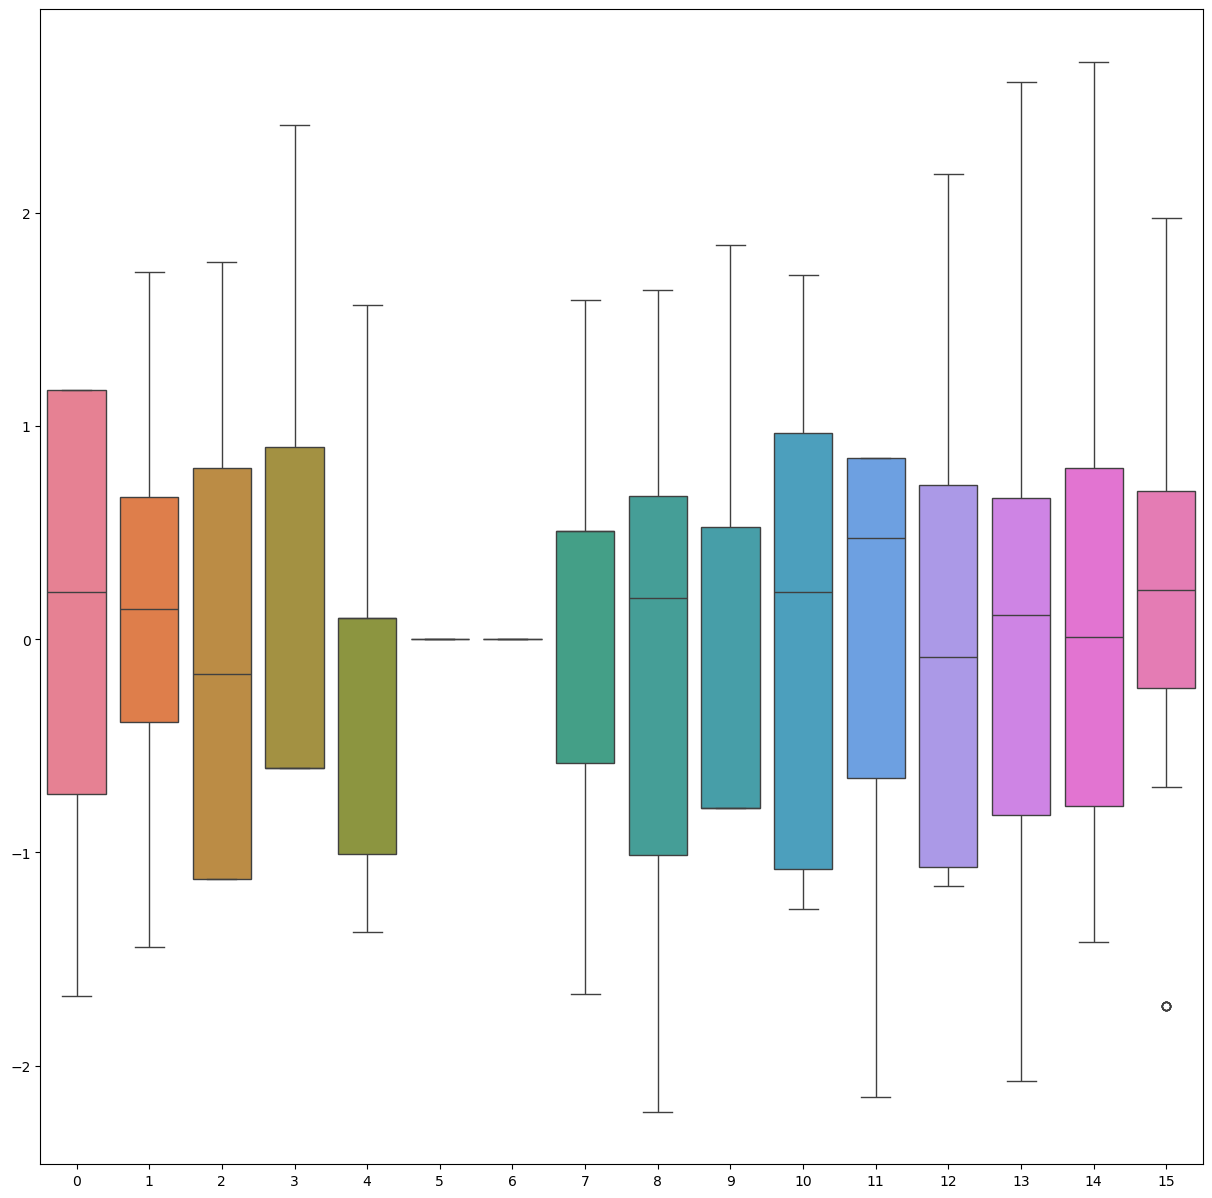

In [81]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_train_norm,ax=ax)

In [82]:
X_test_norm = scaler.transform(X_test.select_dtypes(include='float64'))

In [83]:
X_test_norm

array([[-2.6233791 ,  1.72274826,  1.77051264, -0.60302269,  0.09805807,
         0.        ,  0.        ,  0.50650222,  0.67461719, -0.79240582,
        -1.26360005, -0.64918902, -0.91894864, -0.82322937, -0.78334295,
        -0.28073632],
       [ 0.22124884, -1.44148324,  0.80477847, -0.60302269, -1.37281295,
         0.        ,  0.        , -0.57885968, -0.28912165,  0.52827054,
         0.22298824, -0.64918902, -0.32222874, -0.51061062, -0.78334295,
        -0.0753195 ],
       [ 0.22124884,  1.72274826, -0.16095569,  0.90453403, -1.37281295,
         0.        ,  0.        ,  0.50650222, -0.28912165,  0.52827054,
         0.22298824, -0.64918902,  0.51317911, -1.13584811, -1.41848588,
        -0.69156997],
       [-0.72696047, -0.3867394 , -0.16095569, -0.60302269,  0.09805807,
         0.        ,  0.        , -0.57885968, -2.21659935, -0.79240582,
        -0.5203059 ,  0.09987523, -1.1576366 , -0.19799187, -0.46577148,
        -1.71865408],
       [ 0.22124884, -1.44148324, -1

<Axes: >

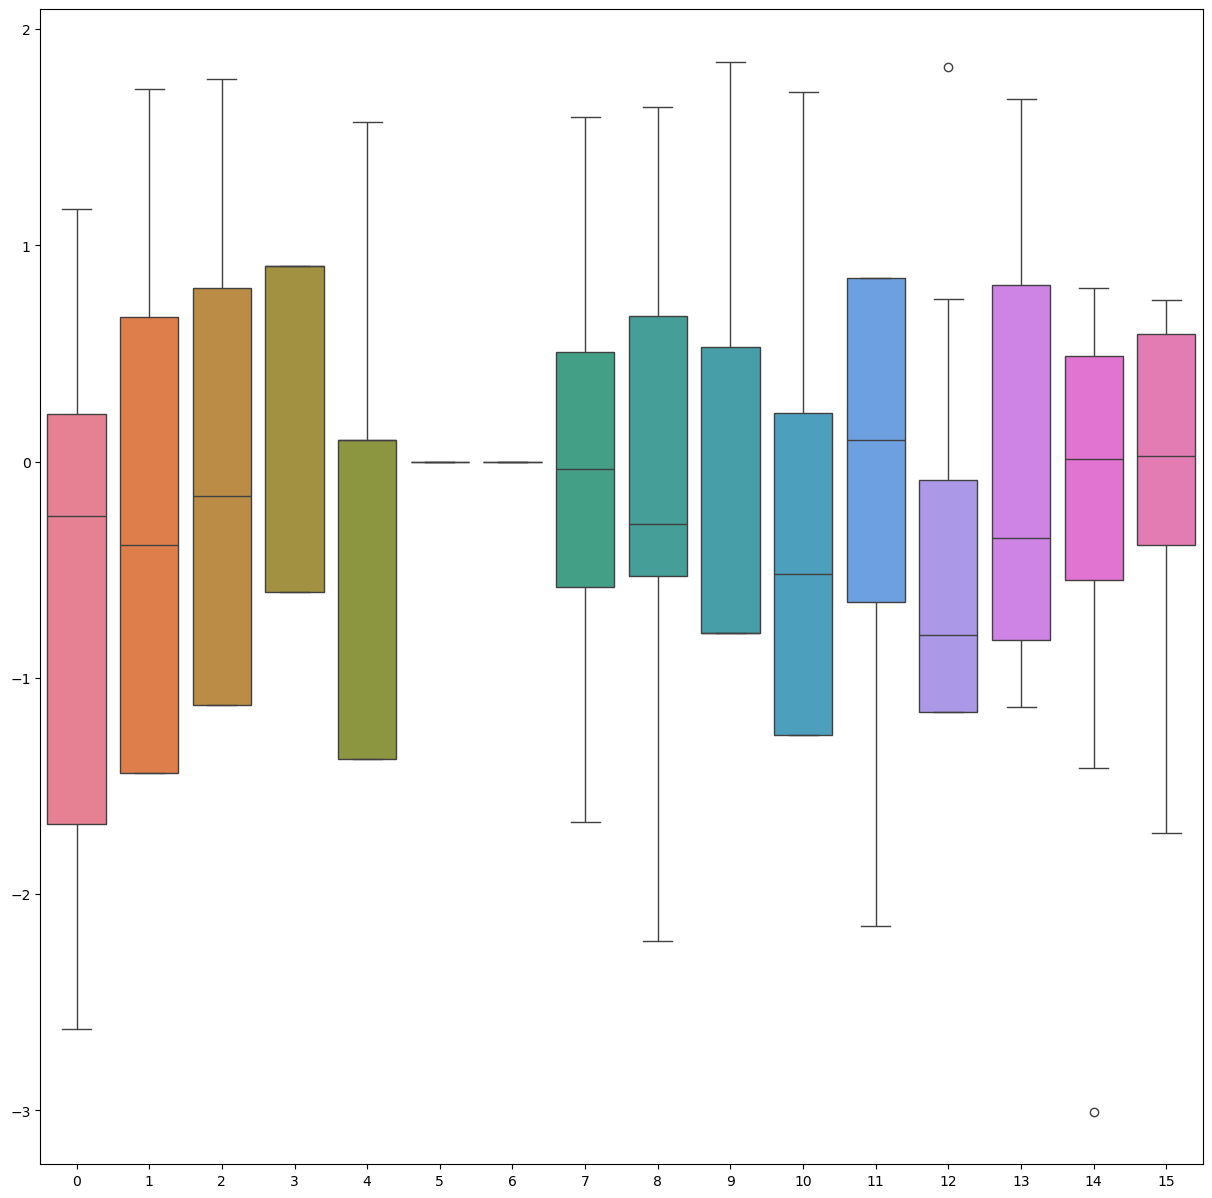

In [84]:
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=X_test_norm,ax=ax)

In [85]:
from sklearn.linear_model import LinearRegression
fail_1_regression = LinearRegression()
fail_1_regression.fit(X_train_norm,Y_train.select_dtypes(include='float64'))

LinearRegression()

In [86]:
print(fail_1_regression.coef_)

[[ 1.05461947e+00 -2.71211837e-16 -3.98822574e-16 -9.21232772e-17
  -1.29101966e-16 -3.76201908e-17 -8.26860808e-18  3.01570692e-16
  -6.19971286e-17  2.94249842e-16  4.15219306e-17 -3.75335317e-16
  -4.34149225e-16 -2.21052588e-16  1.77870971e-16 -3.37665232e-16]
 [ 2.94424503e-16  9.48097510e-01  3.91378098e-16 -4.28222927e-16
  -6.49841216e-16 -1.38777878e-16  5.55111512e-17  4.26398872e-16
  -5.17097897e-16  5.84169146e-16 -1.21564649e-16 -9.49760581e-16
  -3.16377671e-16 -3.35691091e-16  6.79969581e-16 -6.25190596e-16]
 [ 1.23050527e-16  4.45894245e-16  1.03548164e+00 -7.00776753e-16
   1.27148446e-16  2.77555756e-17 -5.55111512e-17  7.51756292e-18
   4.75507315e-16 -1.02438000e-16 -1.29248521e-16 -3.54646238e-16
  -4.78826526e-16 -2.73323534e-16  2.47026326e-16 -1.18997617e-16]
 [ 1.78475339e-16 -2.83384755e-16 -1.44124081e-16  6.63324958e-01
  -3.89924602e-16 -6.93889390e-18 -5.55111512e-17 -3.65803782e-16
  -2.91023635e-16  3.51567152e-16  1.32670167e-16 -6.64262678e-16
  -4.33

In [87]:
fail_1_predict = fail_1_regression.predict(X_test_norm)
fail_1_predict

array([[ 1.50000000e+01,  4.00000000e+00,  4.00000000e+00,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  4.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00,
         2.00000000e+00,  7.00000000e+00,  7.00000000e+00,
         7.00000000e+00],
       [ 1.80000000e+01,  1.00000000e+00,  3.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         2.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         7.00000000e+00,  8.00000000e+00,  7.00000000e+00,
         8.00000000e+00],
       [ 1.80000000e+01,  4.00000000e+00,  2.00000000e+00,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.00000000e+00,  4.00000000e+00,  3.00000000e+00,
         2.00000000e+00,  3.00000000e+00,  3.00000000e+00,
         1.40000000e+01,  6.00000000e+00,  5.00000000e+00,
         5.00000000e+00],
       [ 1.70000000e+01,  2.00000000e

In [88]:
fail_1_residual = Y_test.select_dtypes(include='float64')-fail_1_predict
fail_1_residual

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
49,3.552714e-15,-1.776357e-15,-3.552714e-15,1.554312e-15,-1.332268e-15,0.0,0.0,-8.881784e-16,0.000000e+00,2.220446e-15,6.661338e-16,8.881784e-16,3.552714e-15,5.329071e-15,7.105427e-15,-8.881784e-16
352,0.000000e+00,-1.110223e-15,-4.440892e-16,-1.998401e-15,3.330669e-16,0.0,0.0,4.440892e-16,-1.776357e-15,1.554312e-15,1.776357e-15,1.332268e-15,1.065814e-14,-7.105427e-15,1.776357e-15,2.664535e-15
384,0.000000e+00,-2.664535e-15,4.440892e-16,0.000000e+00,3.330669e-16,0.0,0.0,4.440892e-16,1.332268e-15,4.440892e-16,4.440892e-16,8.881784e-16,3.552714e-15,-1.776357e-15,2.664535e-15,-1.776357e-15
343,0.000000e+00,-1.332268e-15,2.220446e-16,-4.440892e-16,4.440892e-16,0.0,0.0,8.881784e-16,-8.881784e-16,1.443290e-15,2.664535e-15,-1.776357e-15,3.552714e-15,1.776357e-15,-1.776357e-15,5.329071e-15
361,0.000000e+00,2.220446e-15,2.220446e-15,-8.881784e-16,8.881784e-16,0.0,0.0,4.440892e-16,-1.776357e-15,-1.332268e-15,0.000000e+00,-8.881784e-16,2.664535e-15,-3.552714e-15,-3.552714e-15,0.000000e+00
252,0.000000e+00,1.110223e-15,0.000000e+00,-8.881784e-16,-4.440892e-16,0.0,0.0,-4.440892e-16,1.776357e-15,-1.776357e-15,1.776357e-15,-8.881784e-16,1.776357e-15,-7.105427e-15,0.000000e+00,2.664535e-15
315,0.000000e+00,0.000000e+00,-8.881784e-16,-6.661338e-16,4.440892e-16,0.0,0.0,4.440892e-16,-2.664535e-15,9.992007e-16,1.110223e-15,0.000000e+00,1.776357e-15,3.552714e-15,-1.776357e-15,3.552714e-15
162,0.000000e+00,2.220446e-15,1.776357e-15,0.000000e+00,-1.776357e-15,0.0,0.0,0.000000e+00,0.000000e+00,4.440892e-16,0.000000e+00,2.664535e-15,-1.776357e-14,-1.243450e-14,1.598721e-14,-3.552714e-15
389,0.000000e+00,8.881784e-16,2.886580e-15,-4.440892e-16,0.000000e+00,0.0,0.0,8.881784e-16,1.776357e-15,-4.440892e-16,-2.220446e-16,0.000000e+00,-1.243450e-14,-5.329071e-15,2.664535e-15,7.105427e-15
307,0.000000e+00,-1.776357e-15,-1.776357e-15,8.881784e-16,-6.661338e-16,0.0,0.0,-1.332268e-15,1.776357e-15,-8.881784e-16,1.332268e-15,3.108624e-15,5.329071e-15,0.000000e+00,-1.776357e-15,1.065814e-14


C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\3240972038.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(fail_1_residual,kind = 'kde')


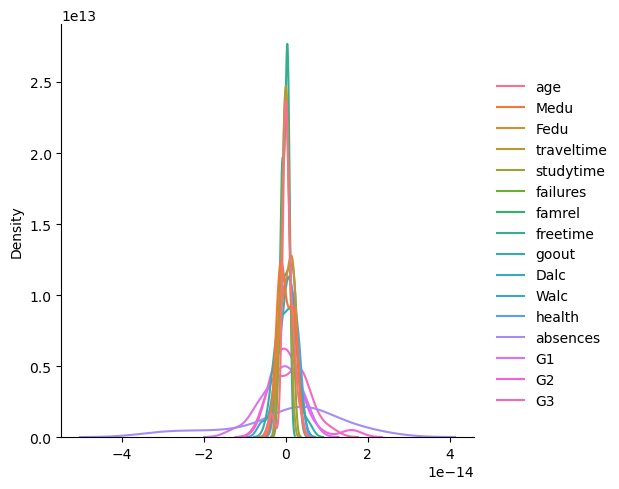

In [89]:
sns.displot(fail_1_residual,kind = 'kde')

In [90]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error",mean_squared_error(Y_test.select_dtypes("float64").dropna(),fail_1_predict))
print("Mean Absolute Error",mean_absolute_error(Y_test.select_dtypes("float64").dropna(),fail_1_predict))
print("R2_Score",r2_score(Y_test.select_dtypes("float64").dropna(),fail_1_predict))


Mean Squared Error 1.5678379379674284e-29
Mean Absolute Error 1.9838297671270764e-15
R2_Score 1.0


> Handling Fail_2 Outliers

<Axes: >

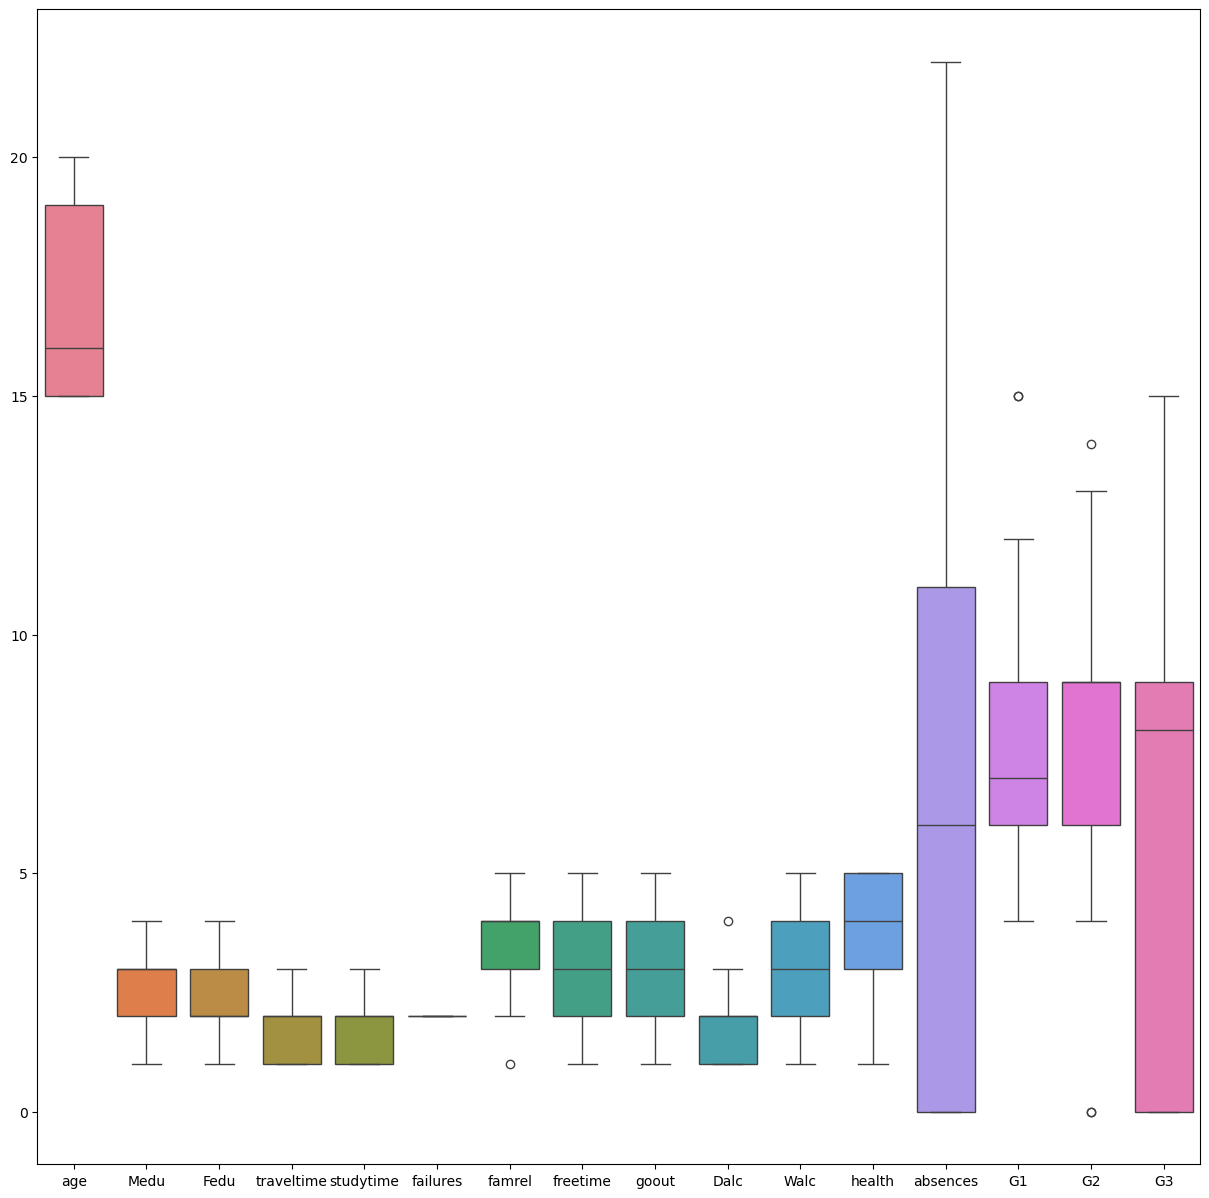

In [92]:
#Before Handling Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_2,ax=ax)

In [93]:
Fail_2['famrel'].value_counts()

famrel
4.0    7
3.0    6
5.0    2
1.0    1
2.0    1
Name: count, dtype: int64

In [94]:
Fail_2['famrel']=Fail_2['famrel'].apply(lambda x : x if x>=round(Fail_2['famrel'].mean()) else round(Fail_2['famrel'].mean()))

In [95]:
Fail_2['Dalc'].value_counts()

Dalc
2.0    8
1.0    7
3.0    1
4.0    1
Name: count, dtype: int64

In [96]:
Fail_2['Dalc'] = Fail_2['Dalc'].apply(lambda x : x if x<round(Fail_2['Dalc'].mean()) else round(Fail_2['Dalc'].mean()))

In [97]:
Fail_2['G1'].value_counts()

G1
7.0     4
6.0     3
9.0     3
15.0    2
8.0     1
12.0    1
4.0     1
10.0    1
5.0     1
Name: count, dtype: int64

In [98]:
Fail_2['G1']=Fail_2['G1'].apply(lambda x:x if x < round(Fail_2['G1'].mean()) else round(Fail_2['G1'].mean()))

In [99]:
Fail_2['G2'].value_counts()

G2
9.0     6
6.0     3
0.0     2
4.0     1
10.0    1
5.0     1
13.0    1
7.0     1
14.0    1
Name: count, dtype: int64

In [100]:
Fail_2['G2']=Fail_2['G2'].apply(lambda x : x if x < 9 else round(Fail_2['G2'].mean()))
Fail_2['G2'] = Fail_2['G2'].apply(lambda x : x if x>5 else 5)

In [101]:
Fail_2['G3'].value_counts()

G3
0.0     5
9.0     4
8.0     2
5.0     1
10.0    1
7.0     1
4.0     1
13.0    1
15.0    1
Name: count, dtype: int64

<Axes: >

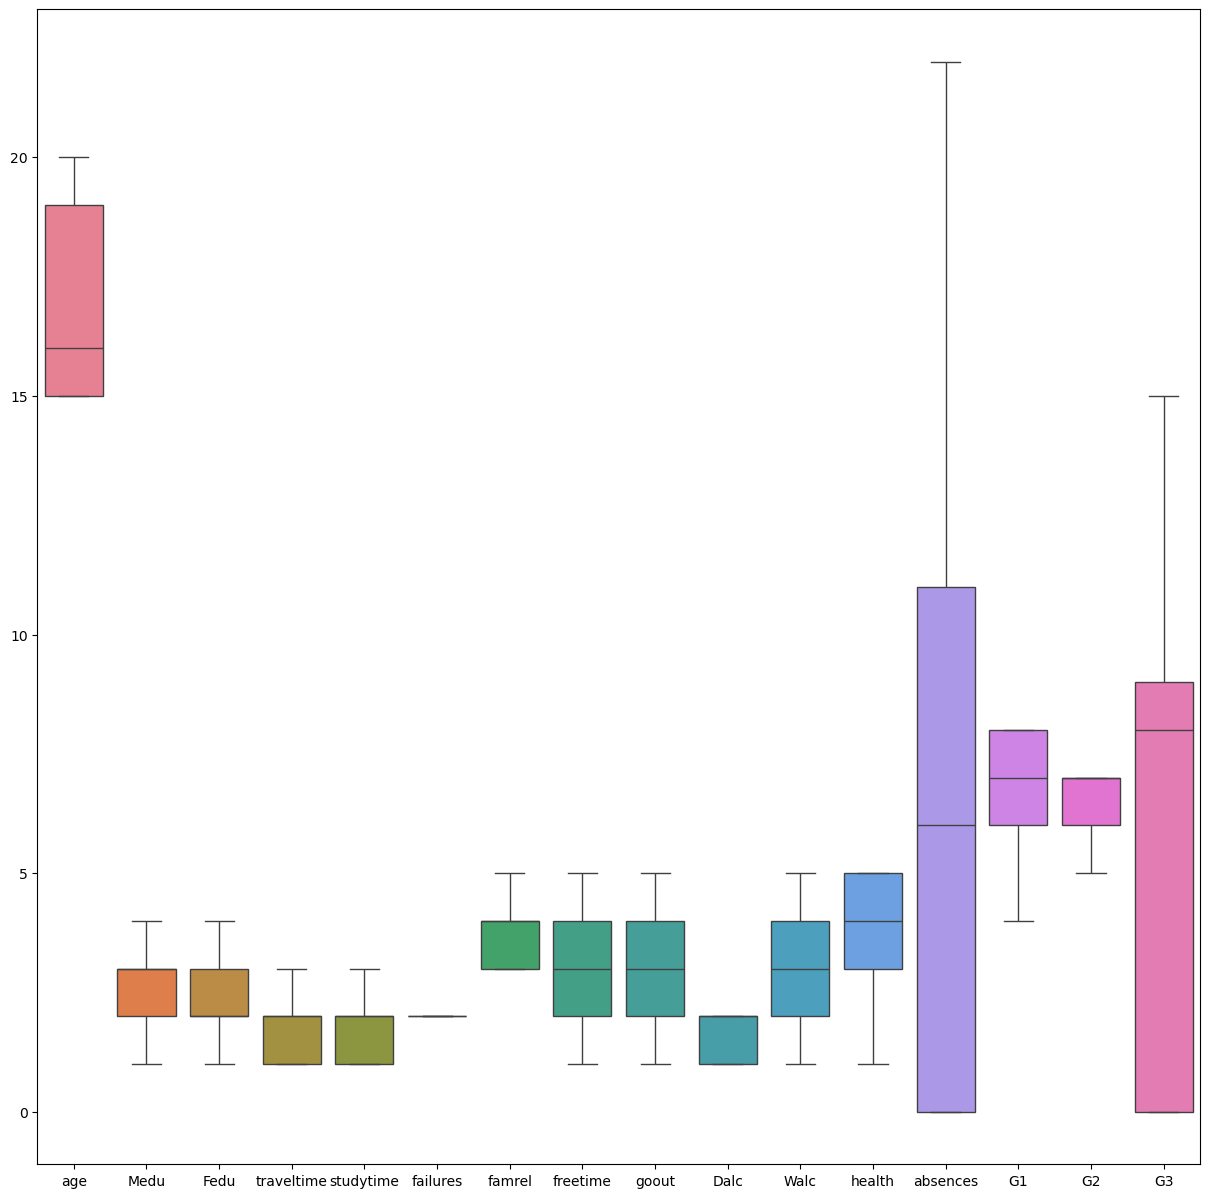

In [102]:
#After Handling Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_2,ax=ax)

C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\4063247573.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = Fail_2,kind='kde')


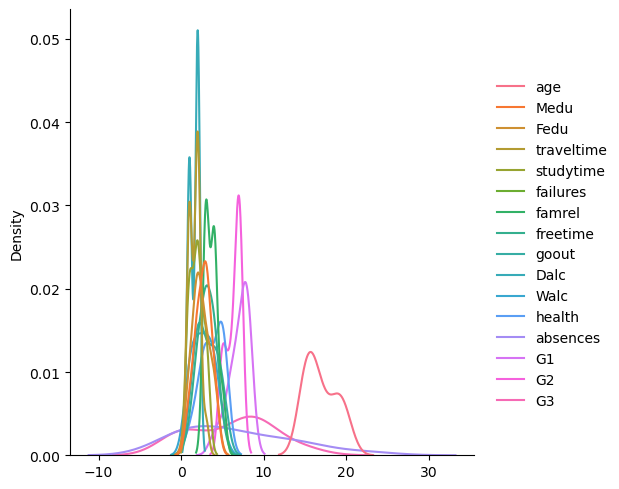

In [103]:
sns.displot(data = Fail_2,kind='kde')

> Handling Fail_3 Outliers

<Axes: >

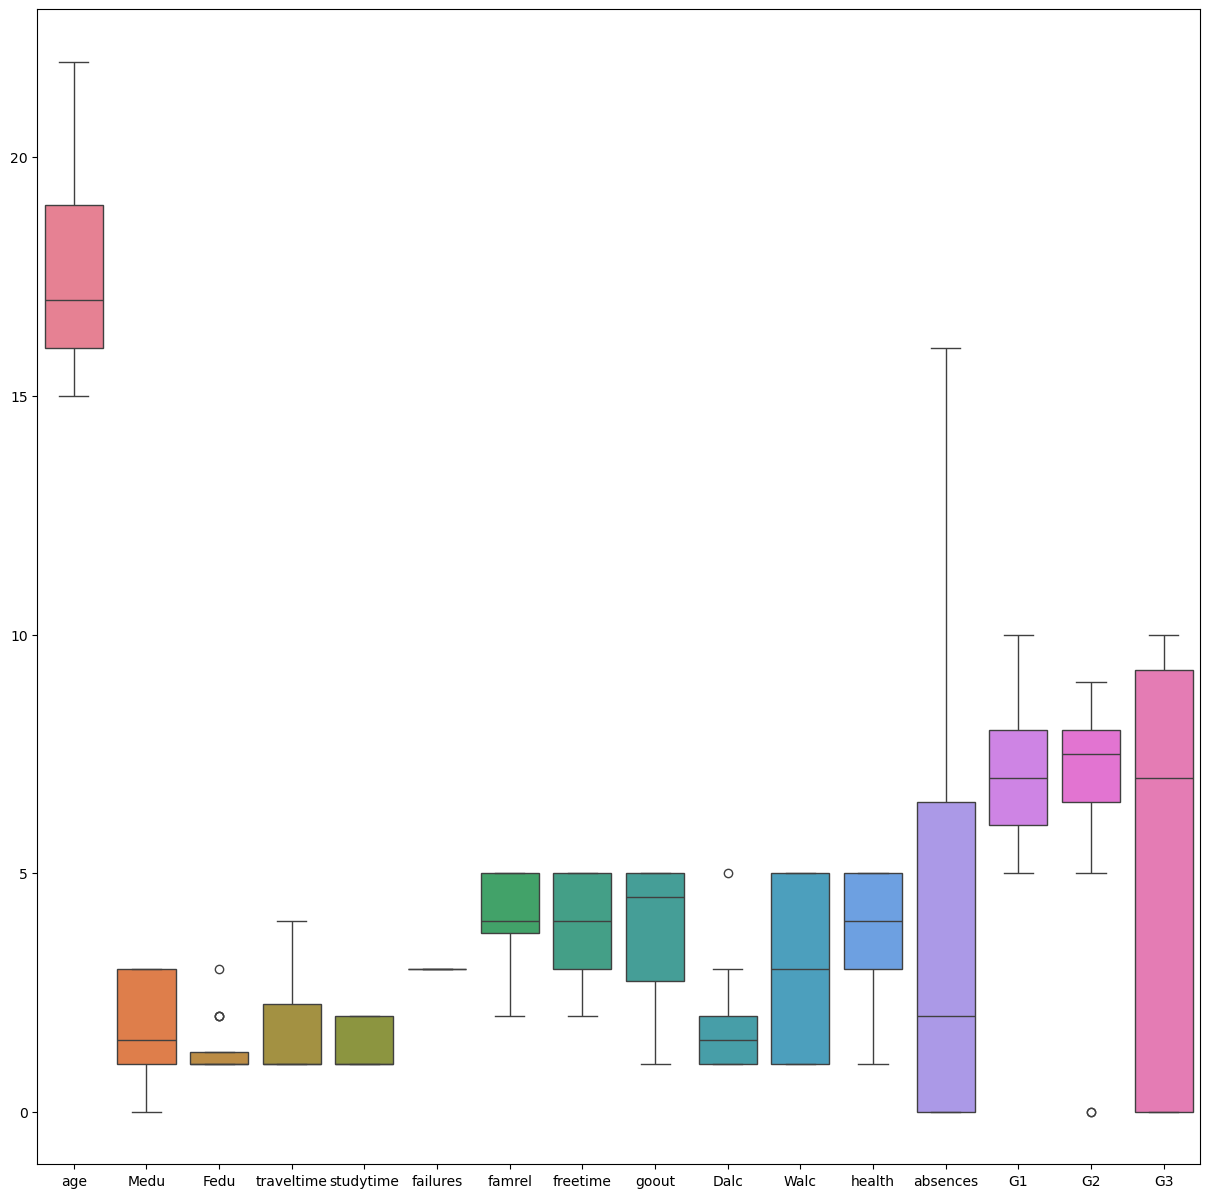

In [105]:
#Before Removing Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_3,ax=ax)

C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\3551733757.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data = Fail_3,kind='kde')


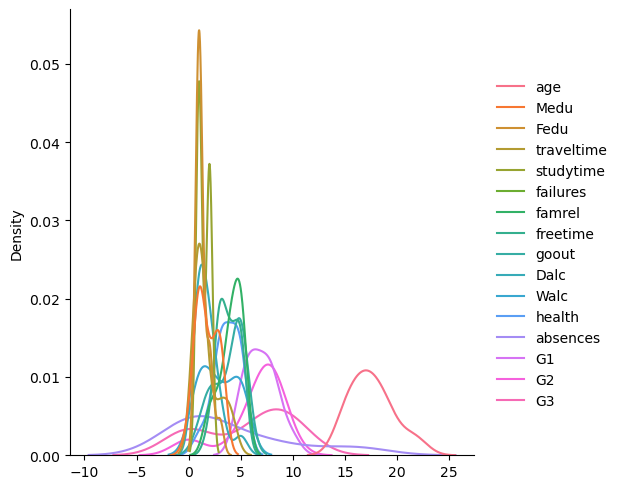

In [106]:
sns.displot(data = Fail_3,kind='kde')

In [107]:
Fail_3['Fedu'].value_counts()

Fedu
1.0    12
2.0     3
3.0     1
Name: count, dtype: int64

In [108]:
Fail_3['Fedu']=Fail_3['Fedu'].apply(lambda x:x if x==round(Fail_3['Fedu'].mean()) else round(Fail_3['Fedu'].mean()))

In [109]:
Fail_3['Dalc'].value_counts()

Dalc
1.0    8
2.0    5
3.0    2
5.0    1
Name: count, dtype: int64

In [110]:
Fail_3['Dalc'] =  Fail_3['Dalc'].replace(5,round(Fail_3['Dalc'].mean()))

In [111]:
Fail_3['G2'].value_counts()

G2
8.0    7
7.0    4
5.0    2
0.0    2
9.0    1
Name: count, dtype: int64

In [112]:
Fail_3["G2"] = Fail_3['G2'].replace(0,5)

<Axes: >

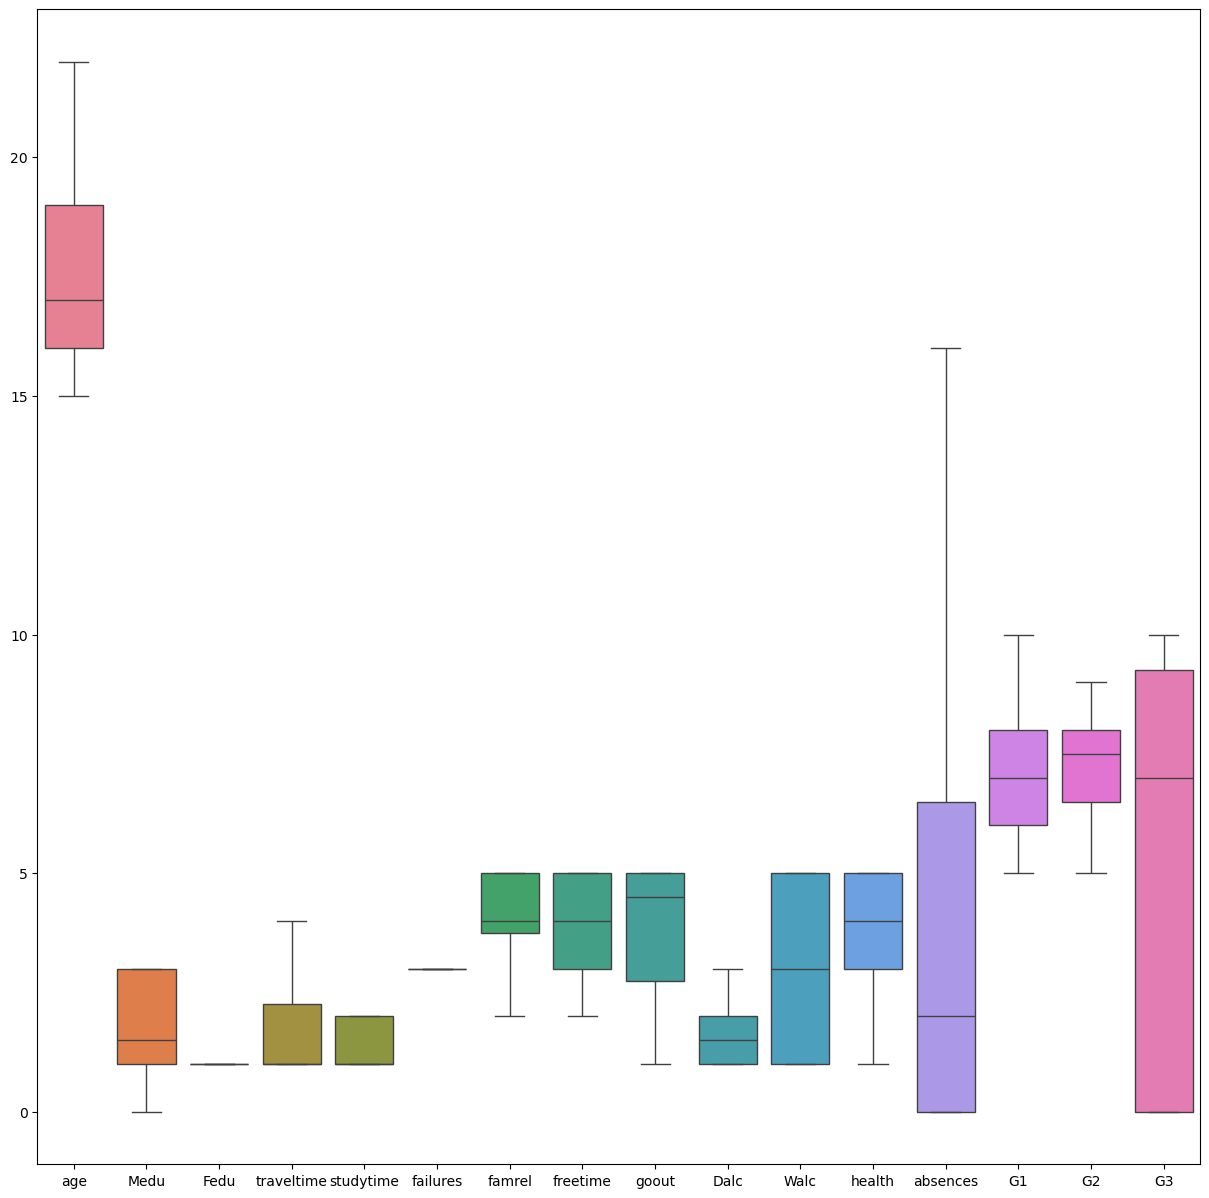

In [113]:
#After Removing Outliers
fig,ax = plt.subplots(figsize = (15,15))
sns.boxplot(data=Fail_3,ax=ax)

C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\4245046575.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(Fail_3,kind='kde')


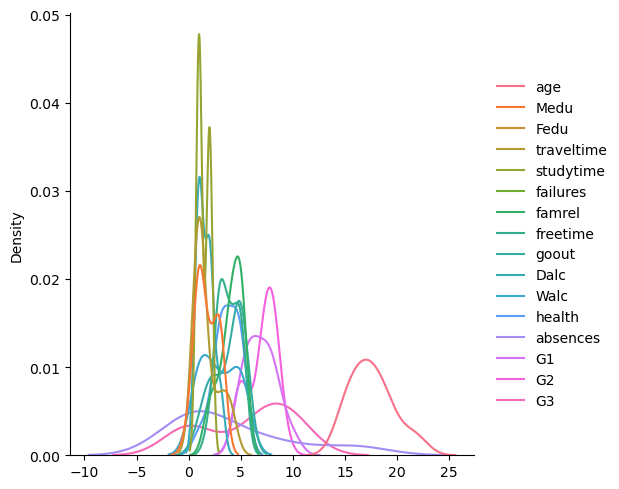

In [114]:
sns.displot(Fail_3,kind='kde')

> Fail_3 Linear Regression

In [116]:
X = Fail_3[::-1]
Y = Fail_3[::-1]

In [117]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=45)

In [118]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train.select_dtypes(include='float64').dropna())
X_test_norm = scaler.transform(X_test.select_dtypes(include='float64').dropna())

In [119]:
from sklearn.linear_model import LinearRegression
Fail_3_regression = LinearRegression()
Fail_3_regression.fit(X_train_norm,Y_train.select_dtypes(include='float64').dropna())

LinearRegression()

In [120]:
print(Fail_3_regression.coef_)

[[ 1.32012118e+00 -1.75141110e-01  0.00000000e+00  4.70056055e-03
   1.42161780e-01  0.00000000e+00 -1.45912494e-01  4.85974384e-01
   3.70317751e-02  2.77487660e-01  8.50913399e-02  3.50483867e-02
  -2.02122774e-01 -1.03275743e-01  4.89812544e-02 -1.20537934e-01]
 [-1.02602689e-01  7.41504639e-01  5.55111512e-17  7.99775602e-02
  -1.81844438e-01  4.16333634e-17 -2.75658020e-01  9.80561012e-02
   3.63527666e-02  4.18973995e-02  1.32542485e-01 -8.69353985e-02
   1.70420635e-04 -3.83130685e-02 -6.75697791e-02 -7.97765059e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.77736082e-03  8.06640754e-02  0.00000000e+00  8.53049691e-01
   1.04768095e-01 -2.77555756e-17  8.62925510e-02  4.79152393e-02
   1.33679664e-01 -4.36904877e-02 -9.54660072e-03 -4.14855553e-02
  -1.12

In [121]:
Fail_3_reg_predict = Fail_3_regression.predict(X_test_norm)
Fail_3_reg_predict

array([[16.34888365,  2.62969451,  1.        ,  3.97048285,  1.06754475,
         3.        ,  4.62577012,  4.10139703,  4.33231047,  1.47755928,
         4.8513789 ,  5.12186491,  1.77263548,  8.72720481,  8.63481613,
        10.43971344],
       [18.32017991,  2.36947706,  1.        ,  0.5408854 ,  1.62282287,
         3.        ,  3.5859985 ,  2.97667191,  4.97568319,  2.26273243,
         3.52435975,  4.74409392, -0.50395152,  5.78009506,  6.25458539,
         0.96152317],
       [16.28022177,  1.02721775,  1.        ,  2.92837821,  1.51772964,
         3.        ,  5.2499411 ,  3.281773  ,  4.78601687,  1.78317075,
         4.83404111,  4.51432283,  2.86166225,  8.5950134 ,  8.60164929,
         8.06112104],
       [20.33120456,  2.79123751,  1.        ,  1.22194708,  1.53914014,
         3.        ,  5.02796751,  5.2007834 ,  3.73749311,  2.58510652,
         5.60646668,  1.54677129, 13.11600891,  6.33708084,  7.72344985,
         4.01752577],
       [15.06461527,  2.84201238,  1

In [122]:
Fail_3_residual = Y_test.select_dtypes(include='float64').dropna()-Fail_3_reg_predict
Fail_3_residual

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
149,-1.348884,-0.629695,0.0,0.029517,-0.067545,0.0,-0.625770,0.898603,0.667690,0.522441,0.148621,-0.121865,-1.772635,-0.727205,0.365184,-0.439713
150,-0.320180,-1.369477,0.0,0.459115,-0.622823,0.0,-1.585998,0.023328,0.024317,-0.262732,1.475640,-0.744094,0.503952,0.219905,-1.254585,-0.961523
157,1.719778,-0.027218,0.0,0.071622,-0.517730,0.0,-0.249941,-1.281773,0.213983,-0.783171,0.165959,-0.514323,3.138338,0.404987,-0.601649,1.938879
247,1.668795,0.208762,0.0,-0.221947,-0.539140,0.0,-0.027968,-1.200783,1.262507,-0.585107,-0.606467,-0.546771,2.883991,-0.337081,0.276550,3.982474
146,-0.064615,0.157988,0.0,0.206729,0.158520,0.0,0.245757,0.020481,-0.809145,0.111411,-0.050551,0.344395,0.523040,0.274166,0.052970,-2.222617


C:\Users\apurv\AppData\Local\Temp\ipykernel_3484\1181344936.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(Fail_3_residual,kind='kde')


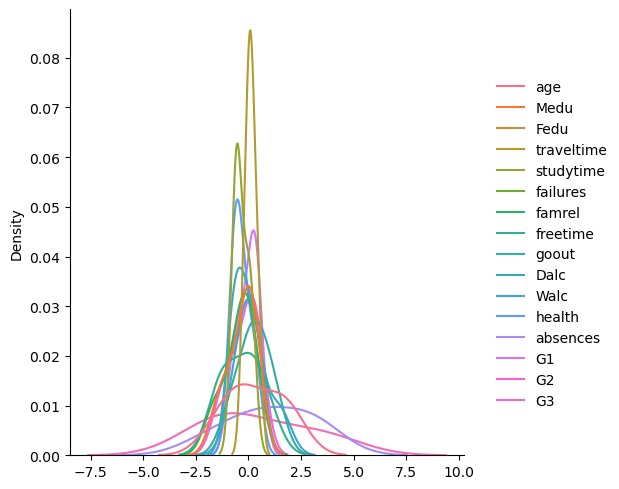

In [123]:
sns.displot(Fail_3_residual,kind='kde')

In [124]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("Mean Squared Error ",mean_squared_error(Y_test.select_dtypes(include="float64").dropna(),Fail_3_reg_predict))
print("Mean Absolute Error ",mean_absolute_error(Y_test.select_dtypes(include="float64").dropna(),Fail_3_reg_predict))
print("R Square Score ",r2_score(Y_test.select_dtypes(include="float64").dropna(),Fail_3_reg_predict))

Mean Squared Error  0.9588775361268577
Mean Absolute Error  0.6176639393540492
R Square Score  0.638615805960614


Above We have seen that there are students who failed in some subjects and some don't now we are trying to figure out the reasons due to which they failed and they don't

In [126]:
Fail_0

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,5.0,5.0,11.0,11.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,5.0,5.0,11.0,11.0
3,GP,F,15.0,U,GT3,T,4.0,2.0,health,services,...,3.0,2.0,2.0,1.0,1.0,5.0,5.0,15.0,14.0,15.0
4,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,4.0,3.0,2.0,1.0,2.0,5.0,5.0,6.0,10.0,10.0
5,GP,M,16.0,U,LE3,T,4.0,3.0,services,other,...,5.0,4.0,2.0,1.0,2.0,5.0,5.0,15.0,15.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,MS,F,18.0,R,GT3,T,4.0,4.0,teacher,at_home,...,4.0,4.0,3.0,2.0,2.0,5.0,NaN,6.0,11.0,11.0
388,MS,F,18.0,U,LE3,T,3.0,1.0,teacher,services,...,4.0,3.0,4.0,1.0,1.0,1.0,NaN,7.0,9.0,8.0
391,MS,M,17.0,U,LE3,T,3.0,1.0,services,services,...,4.0,4.0,5.0,3.0,4.0,2.0,NaN,14.0,16.0,16.0
393,MS,M,18.0,R,LE3,T,3.0,2.0,services,other,...,4.0,4.0,1.0,3.0,4.0,5.0,NaN,11.0,12.0,10.0


In [127]:
Fail_0_No_Fees = Fail_0.where(data['paid']=='no').dropna()
Fail_0_No_Fees

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18.0,U,GT3,A,4.0,4.0,at_home,teacher,...,4.0,3.0,4.0,1.0,1.0,3.0,5.0,5.0,11.0,11.0
1,GP,F,17.0,U,GT3,T,1.0,1.0,at_home,other,...,5.0,3.0,3.0,1.0,1.0,3.0,5.0,5.0,11.0,11.0
6,GP,M,16.0,U,LE3,T,2.0,2.0,other,other,...,4.0,4.0,4.0,1.0,1.0,3.0,5.0,12.0,12.0,11.0
7,GP,F,17.0,U,GT3,A,4.0,4.0,other,teacher,...,4.0,3.0,4.0,1.0,1.0,1.0,5.0,6.0,11.0,11.0
11,GP,F,15.0,U,GT3,T,2.0,1.0,services,other,...,5.0,2.0,2.0,1.0,1.0,4.0,5.0,10.0,12.0,12.0
14,GP,M,15.0,U,GT3,A,2.0,2.0,other,other,...,4.0,5.0,2.0,1.0,1.0,3.0,5.0,14.0,16.0,16.0
15,GP,F,16.0,U,GT3,T,4.0,4.0,health,other,...,4.0,4.0,4.0,1.0,2.0,2.0,2.0,14.0,14.0,14.0
17,GP,F,16.0,U,GT3,T,3.0,3.0,other,other,...,5.0,3.0,2.0,1.0,1.0,4.0,2.0,8.0,10.0,10.0
20,GP,M,15.0,U,GT3,T,4.0,3.0,teacher,other,...,4.0,4.0,1.0,1.0,1.0,1.0,1.0,13.0,14.0,15.0
22,GP,M,16.0,U,LE3,T,4.0,2.0,teacher,other,...,4.0,5.0,1.0,1.0,3.0,5.0,1.0,15.0,15.0,16.0


In [128]:
Fail_0_No_Fees['school']

0     GP
1     GP
6     GP
7     GP
11    GP
14    GP
15    GP
17    GP
20    GP
22    GP
23    GP
Name: school, dtype: object

***So Most of the students who haven't paid the fees and also not failed in any subject are from the same school***

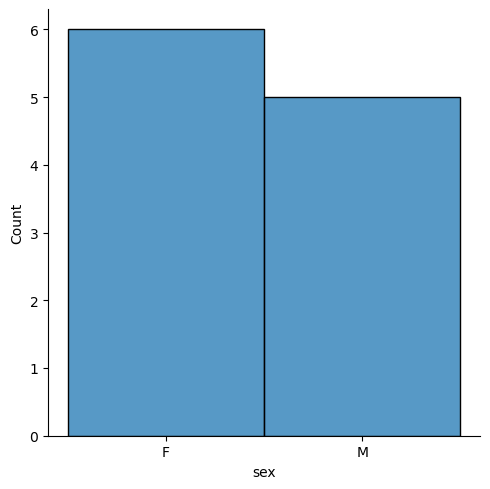

In [130]:
sns.displot(Fail_0_No_Fees['sex'])

***This is the sex ratio of students for the particular category***

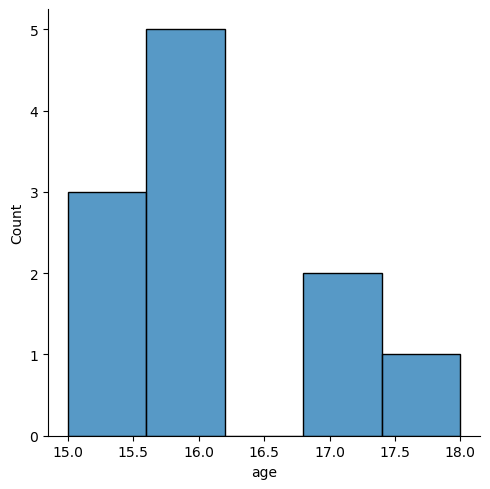

In [132]:
sns.displot(Fail_0_No_Fees['age'])

***Age Group Distribution among the students***

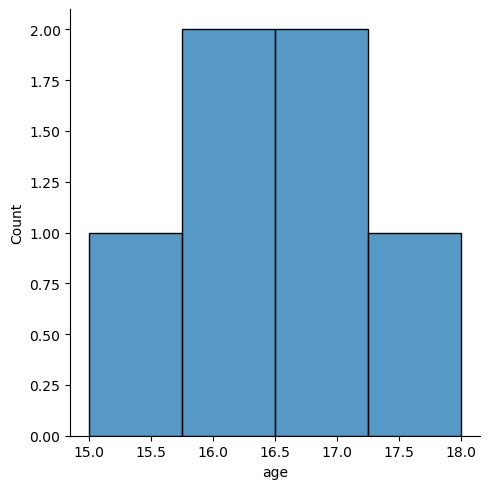

In [134]:
sns.displot(Fail_0_No_Fees['age'].where(Fail_0_No_Fees['sex']=='F'))

***Age Group of Female students in the particular category***

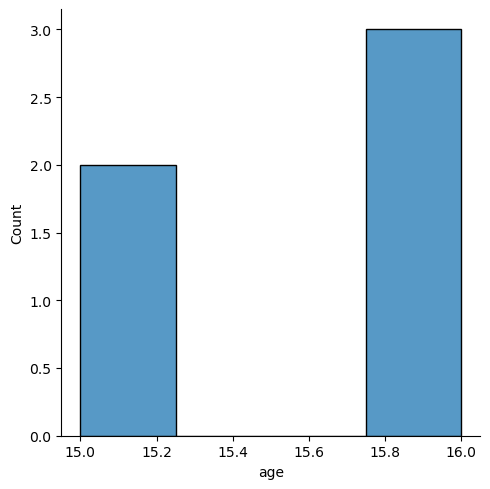

In [136]:
sns.displot(Fail_0_No_Fees['age'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution Among Age Group of Male students in the given category***

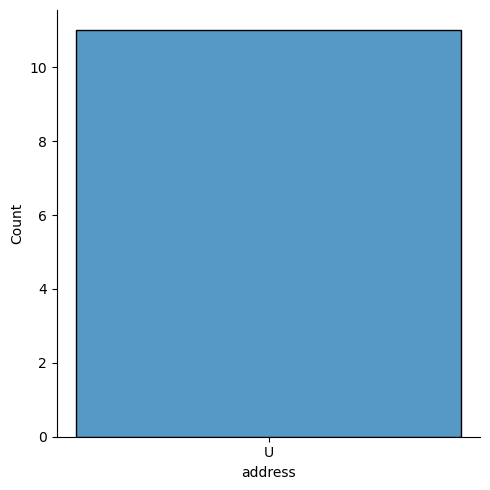

In [138]:
sns.displot(Fail_0_No_Fees['address'])

***From this we can see that all of the students of this category belongs to Urban***

In [140]:
Fail_0_No_Fees['famsize'].value_counts()

famsize
GT3    8
LE3    3
Name: count, dtype: int64

***Family Size of distribution of the particular category***

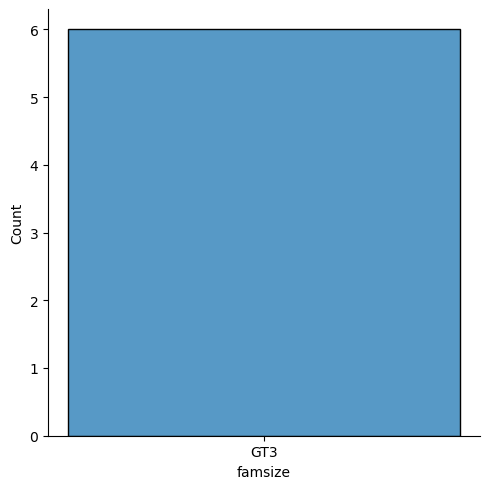

In [142]:
sns.displot(Fail_0_No_Fees['famsize'].where(Fail_0_No_Fees['sex']=='F'))

***Family Size of Female Students of the following group***

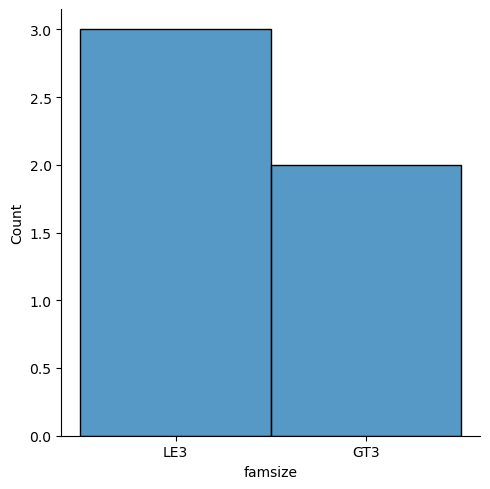

In [144]:
sns.displot(Fail_0_No_Fees['famsize'].where(Fail_0_No_Fees['sex']=='M'))

***Family Size of Male Students of the Particular Group***

In [146]:
Fail_0_No_Fees['Pstatus'].value_counts()

Pstatus
T    8
A    3
Name: count, dtype: int64

***Count of Parents who are together and apart***

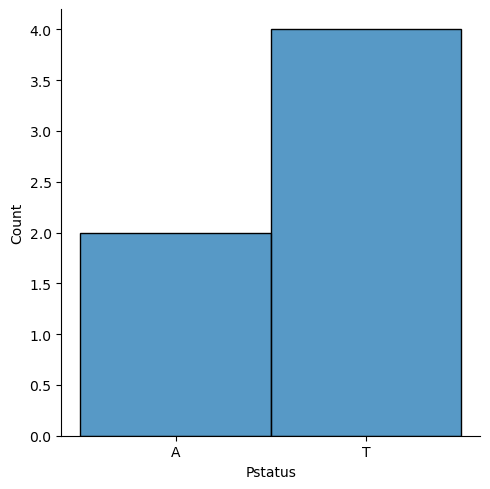

In [148]:
sns.displot(Fail_0_No_Fees['Pstatus'].where(Fail_0_No_Fees['sex']=='F'))

***Parents Status for the female students of the following group***

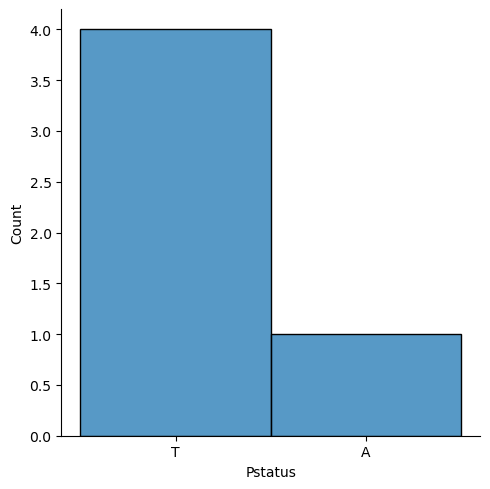

In [150]:
sns.displot(Fail_0_No_Fees['Pstatus'].where(Fail_0_No_Fees['sex']=='M'))

***Parents Status for the Male students of the following group***

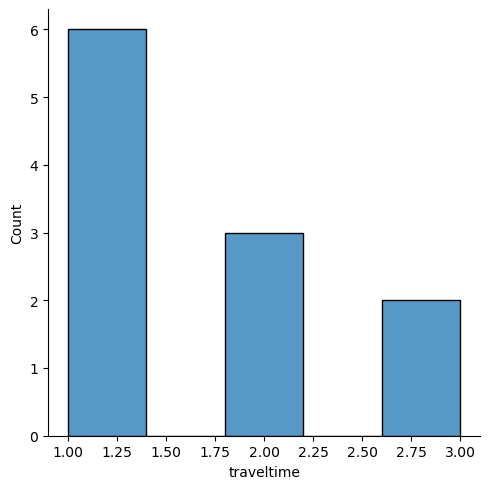

In [152]:
sns.displot(Fail_0_No_Fees['traveltime'])

***Distribution of Travel Time of Students***

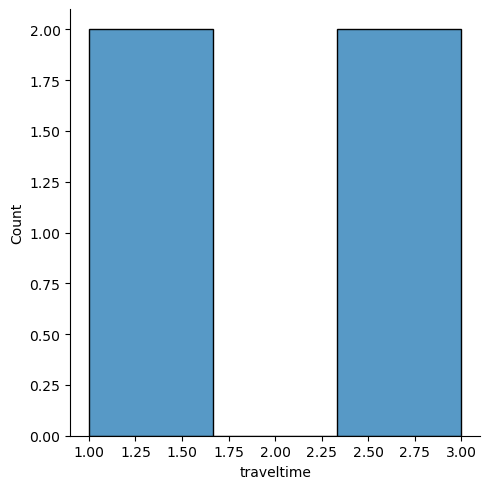

In [154]:
sns.displot(Fail_0_No_Fees['traveltime'].where((Fail_0_No_Fees['sex']=='F') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['Pstatus']=='T')))

***Distribution of Travel Time of Female With Family Size Greater Than 3 and Parents Status Together***

(array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

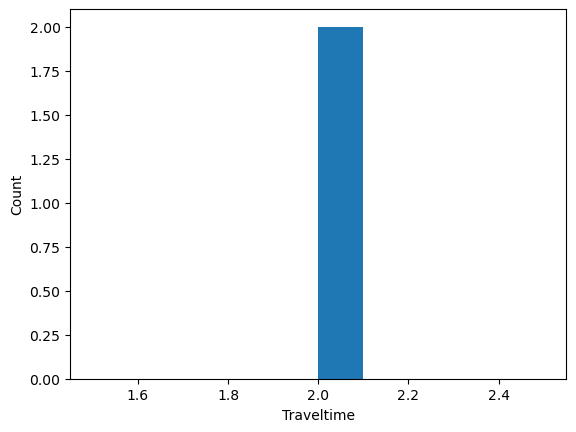

In [156]:
plt.xlabel('Traveltime')
plt.ylabel('Count')

plt.hist(Fail_0_No_Fees['traveltime'].where((Fail_0_No_Fees['sex']=='F') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['Pstatus']=='A')))

***Distribution of Travel Time of Female With Family Size Greater Than 3 and Parents Status Apart***

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

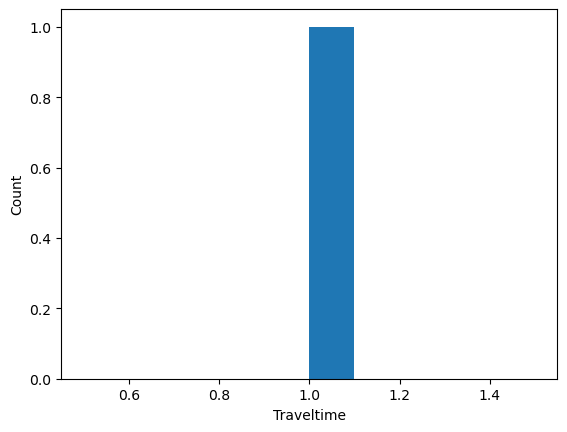

In [158]:
plt.xlabel('Traveltime')
plt.ylabel('Count')
plt.hist(Fail_0_No_Fees['traveltime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['Pstatus']=='T')))

***Distribution of Travel Time of Male With Family Size Greater Than 3 and Parents Status Together***

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

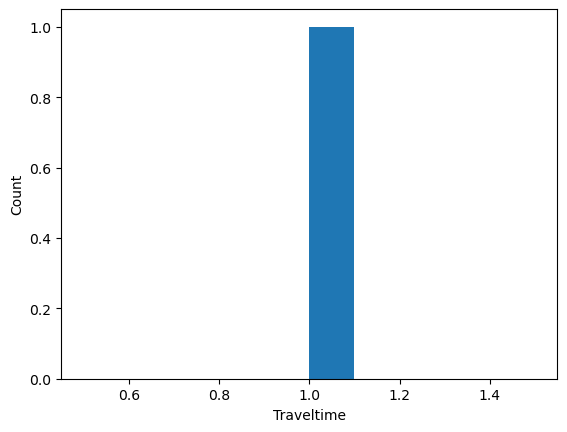

In [160]:
plt.xlabel('Traveltime')
plt.ylabel('Count')
plt.hist(Fail_0_No_Fees['traveltime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['Pstatus']=='A')))

***Distribution of Travel Time of Male With Family Size Greater Than 3 and Parents Status Apart***

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

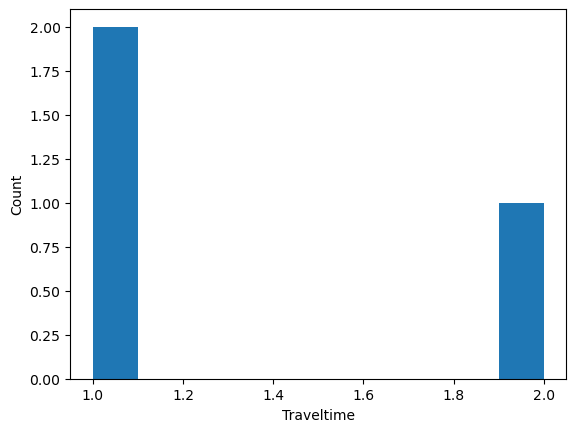

In [162]:
plt.xlabel('Traveltime')
plt.ylabel('Count')
plt.hist(Fail_0_No_Fees['traveltime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='LE3') & (Fail_0_No_Fees['Pstatus']=='T')))

***Distribution of Travel Time of Male With Family Size Less Than 3 and Parents Status Together***

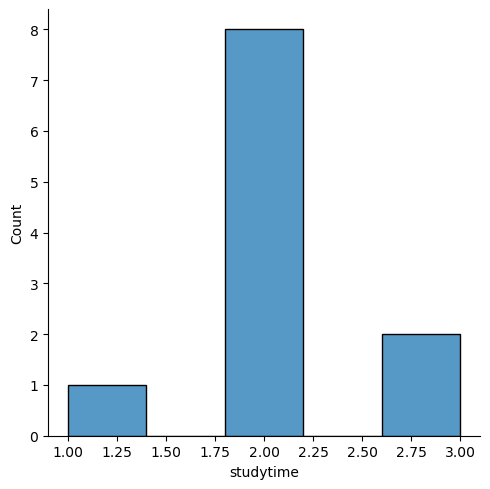

In [164]:
sns.displot(Fail_0_No_Fees['studytime'])

***Distribution of Study Time***

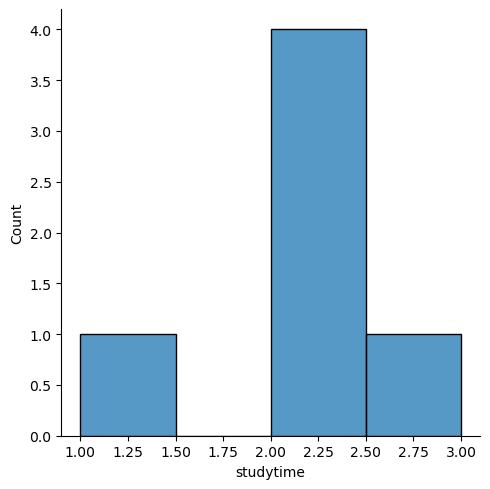

In [166]:
sns.displot(Fail_0_No_Fees['studytime'].where(Fail_0_No_Fees['sex']=='F'))

***Distribution of Female student Study Time***

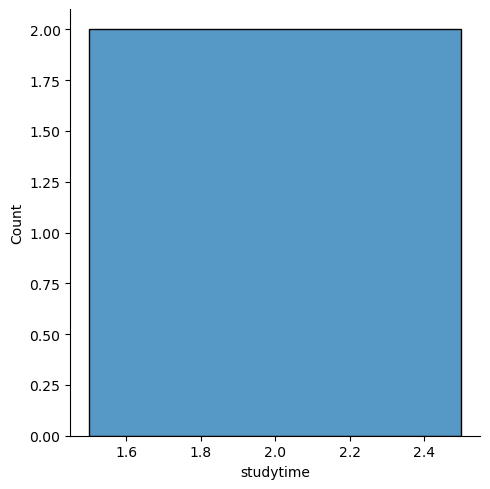

In [168]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='F') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['schoolsup']=='yes') &
           (Fail_0_No_Fees['famsup']=='yes')))

***Distribution of Female student With Family Size More than 3 with School and Family Support Study Time***

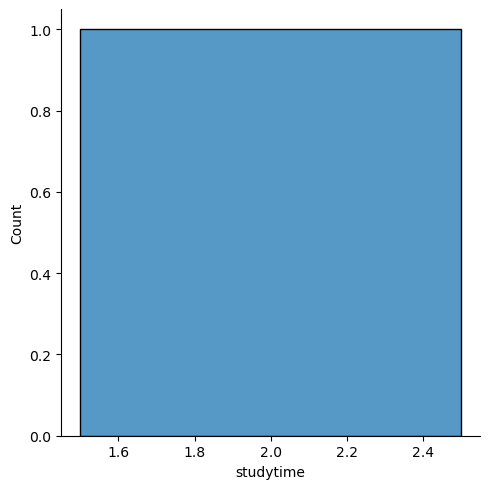

In [170]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='F') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['schoolsup']=='yes') &
           (Fail_0_No_Fees['famsup']=='no')))

***Distribution of Female student With Family Size More than 3 with School Support but without Family Support Study Time***

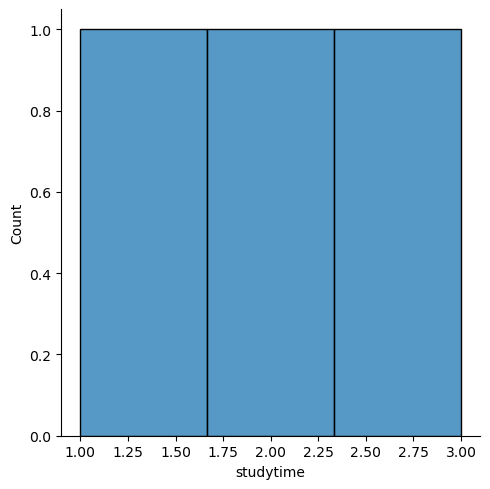

In [172]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='F') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['schoolsup']=='no') &
           (Fail_0_No_Fees['famsup']=='yes')))

***Distribution of Female student With Family Size More than 3 without School Support and with Family Support Study Time***

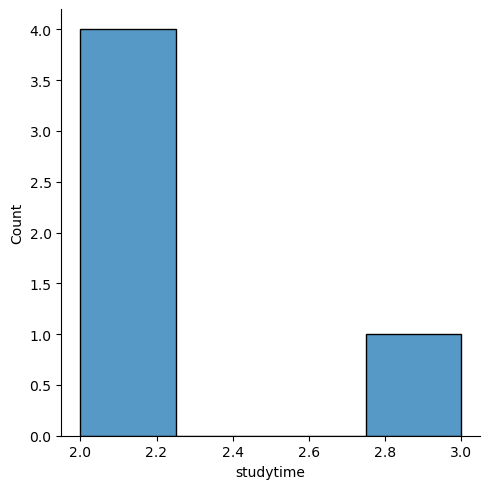

In [174]:
sns.displot(Fail_0_No_Fees['studytime'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution of Male student***

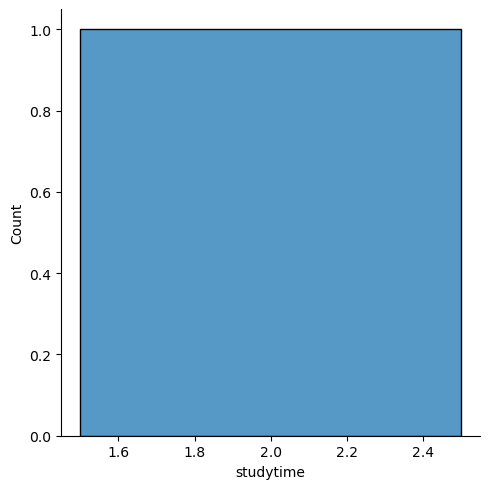

In [176]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['schoolsup']=='no') &
           (Fail_0_No_Fees['famsup']=='no')))

***Distribution of Male student With Family Size More than 3 without School and Family Support Study Time***

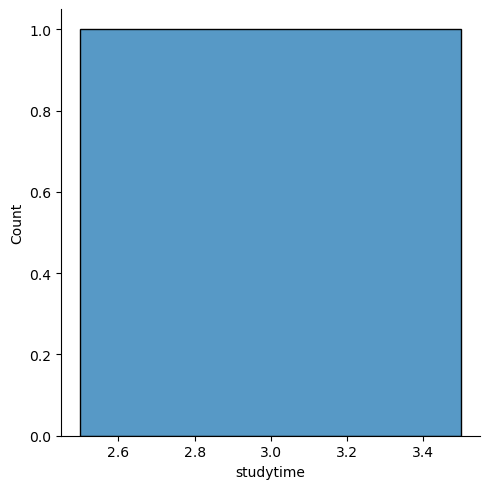

In [178]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='GT3') & (Fail_0_No_Fees['schoolsup']=='no') &
           (Fail_0_No_Fees['famsup']=='yes')))

***Distribution of Male student With Family Size More than 3 without School Support and with Family Support Study Time***

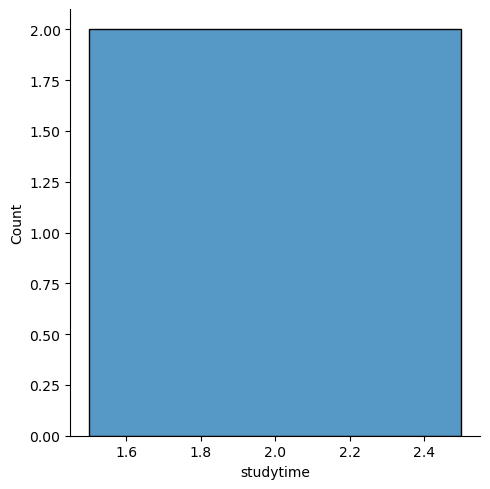

In [180]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='LE3') & (Fail_0_No_Fees['schoolsup']=='no') &
           (Fail_0_No_Fees['famsup']=='no')))

***Distribution of Male student With Family Size Less than Equal to 3 without School and Family Support Study Time***

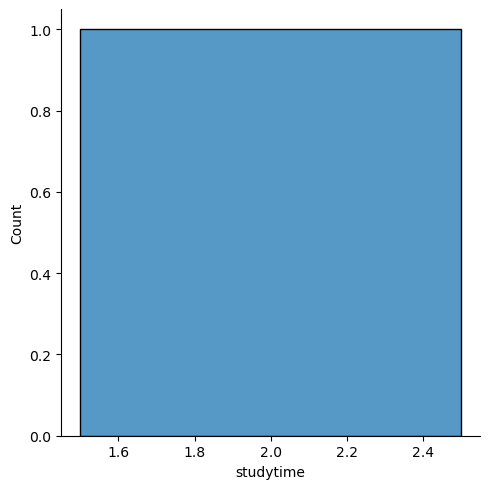

In [182]:
sns.displot(Fail_0_No_Fees['studytime'].where((Fail_0_No_Fees['sex']=='M') & (Fail_0_No_Fees['famsize']=='LE3') & (Fail_0_No_Fees['schoolsup']=='no') &
           (Fail_0_No_Fees['famsup']=='yes')))

***Distribution of Male student With Family Size Less than Equal to 3 without School Support with Family Support Study Time***

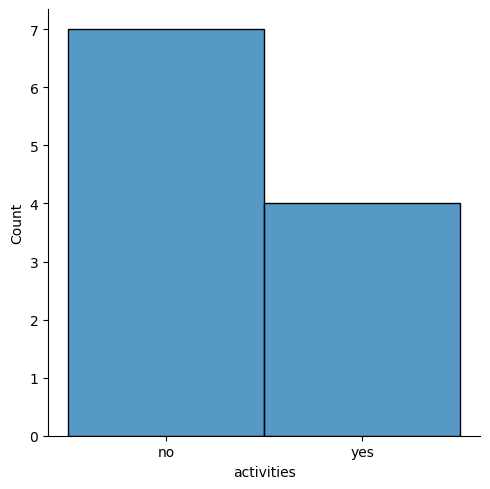

In [184]:
sns.displot(Fail_0_No_Fees['activities'])

***Distribution of Students involved in other activities along with studies***

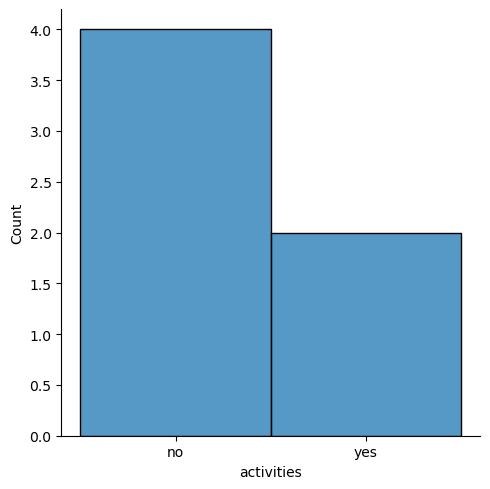

In [186]:
sns.displot(Fail_0_No_Fees['activities'].where(Fail_0_No_Fees['sex']=='F'))

***Distribution of Female Students involved in other activities along with studies***

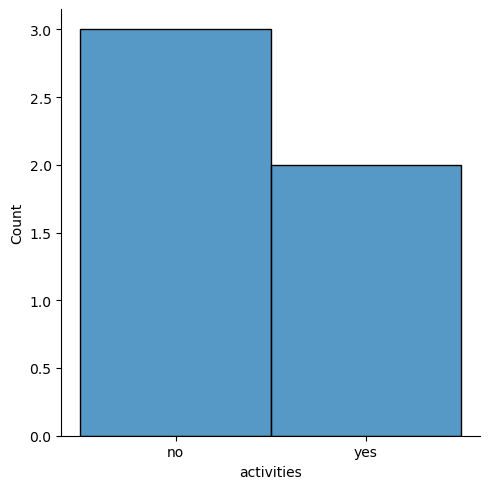

In [188]:
sns.displot(Fail_0_No_Fees['activities'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution of Male Students involved in other activities along with studies***

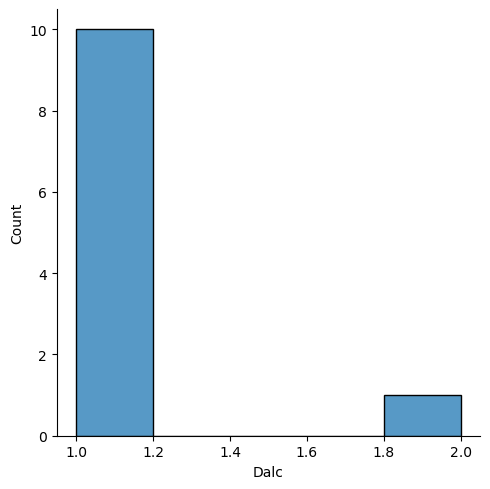

In [190]:
sns.displot(Fail_0_No_Fees['Dalc'])

***Distribution of Daily Alcohol Consumption by Students***

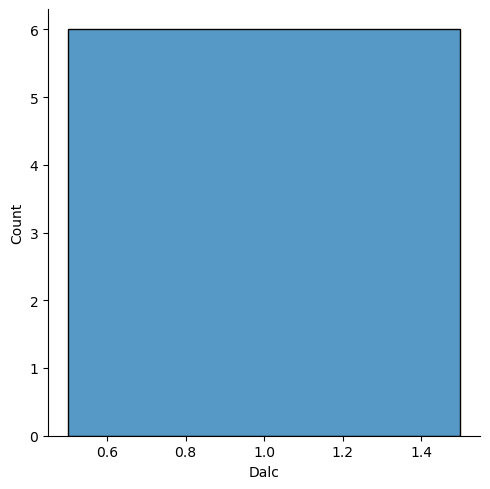

In [192]:
sns.displot(Fail_0_No_Fees['Dalc'].where(Fail_0_No_Fees['sex']=='F'))

***Distribution of Daily Alcohol Consumption by Female Students***

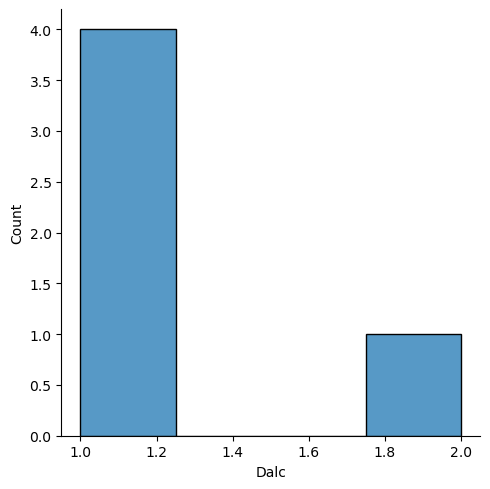

In [194]:
sns.displot(Fail_0_No_Fees['Dalc'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution of Daily Alcohol Consumption by Male Students***

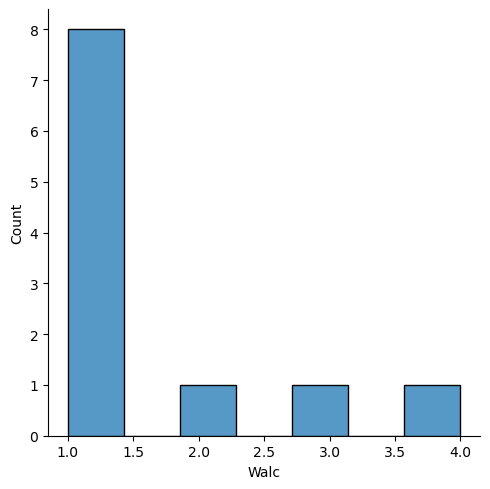

In [196]:
sns.displot(Fail_0_No_Fees['Walc'])

***Distribution Weekly Alcohol Consumption By Students***

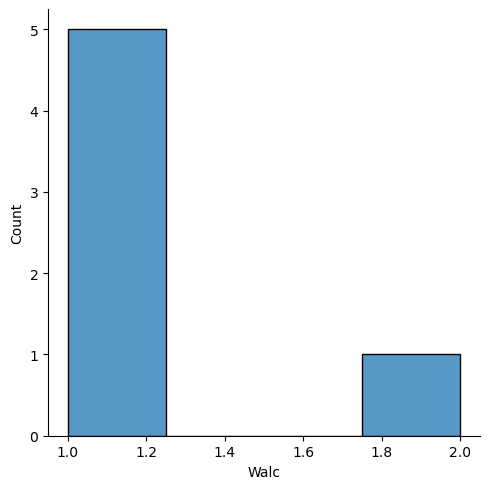

In [198]:
sns.displot(Fail_0_No_Fees['Walc'].where(Fail_0_No_Fees['sex']=='F'))

***Distribution of Weekly Alcohol Consumption by Female Students***

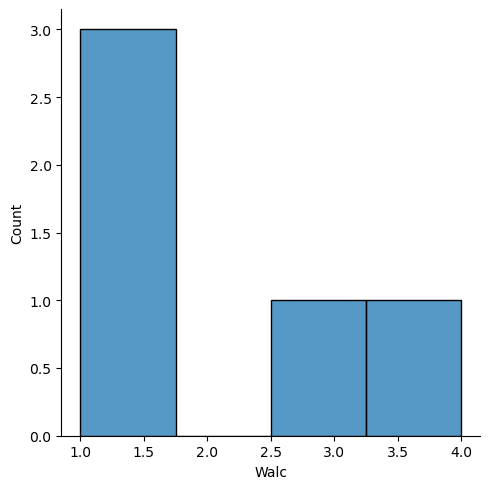

In [200]:
sns.displot(Fail_0_No_Fees['Walc'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution of Weekly Alcohol Comsumption by Male Students***

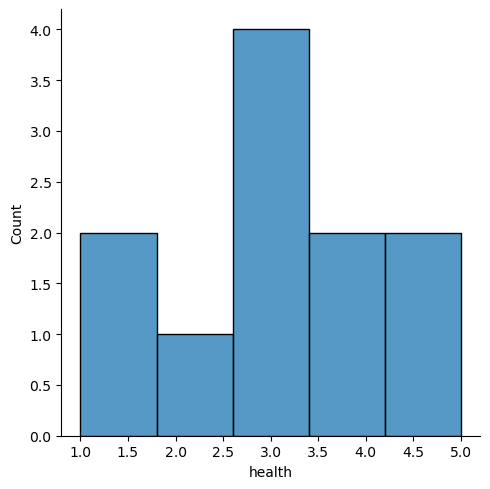

In [202]:
sns.displot(Fail_0_No_Fees['health'])

***Distribution of Students health 
Where 1 : Lowest 5 : Highest***


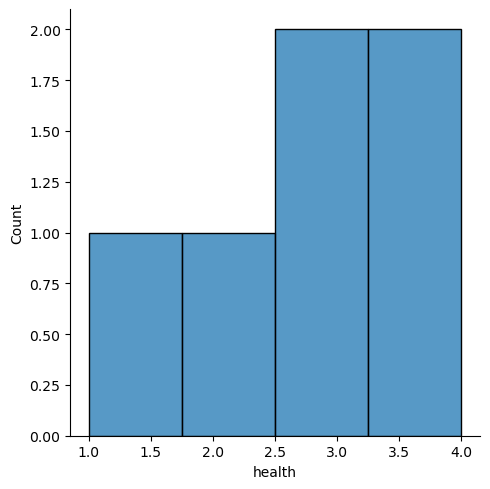

In [204]:
sns.displot(Fail_0_No_Fees['health'].where(Fail_0_No_Fees['sex']=='F'))

***Distibution of Female Student Health***

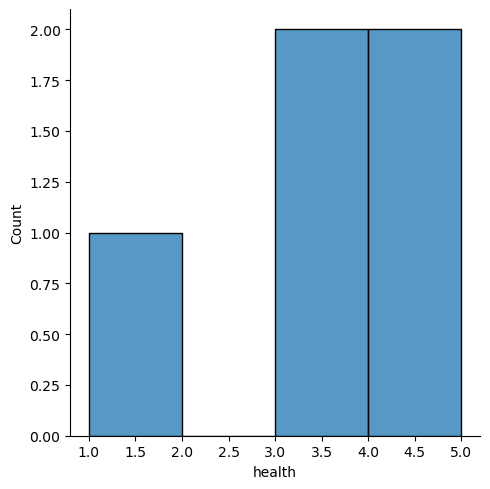

In [206]:
sns.displot(Fail_0_No_Fees['health'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution of Male Student health***

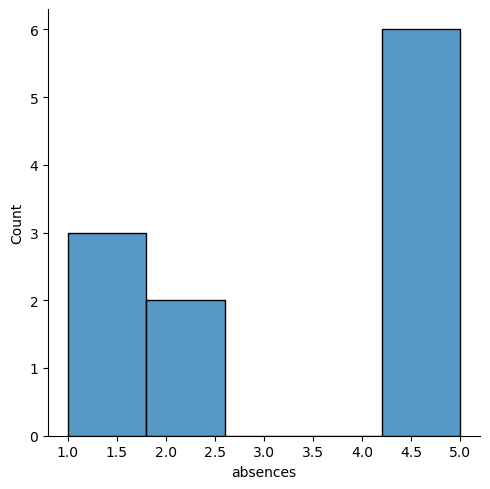

In [208]:
sns.displot(Fail_0_No_Fees['absences'])

***Distribution of Absences of Students***

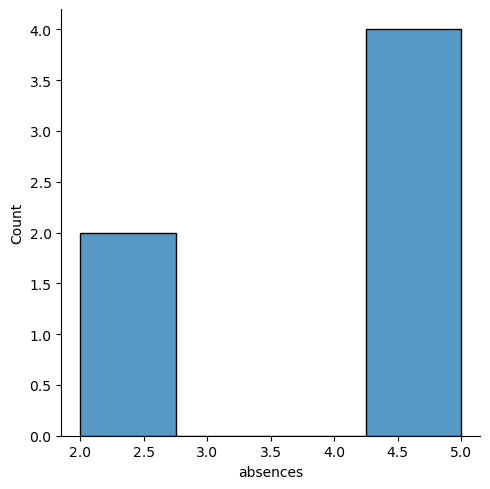

In [210]:
sns.displot(Fail_0_No_Fees['absences'].where(Fail_0_No_Fees['sex']=='F'))

***Distribution of Abesences of Female Students***

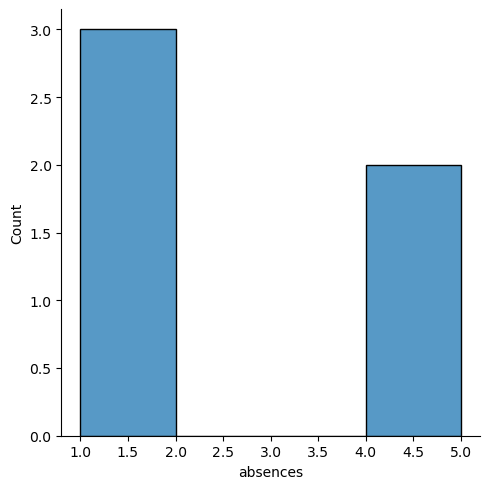

In [212]:
sns.displot(Fail_0_No_Fees['absences'].where(Fail_0_No_Fees['sex']=='M'))

***Distribution of Absences of Male Students***